In [1]:
k = 8031

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D

# Load data

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "moons" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space =100 #12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 8000 #4000
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


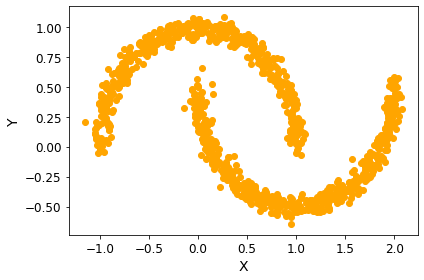

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [6]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                3000      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [7]:
wgan = WGAN_Model_2D.WGAN(k, n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 3640      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2541      
Total params: 6,181
Trainable params: 6,081
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)


## Training

Epoch 1/8000
critic: 7.039017 - generator: -0.100876 - 6s
Epoch 2/8000
critic: 0.108804 - generator: -0.036448 - 0s
Epoch 3/8000
critic: 0.086944 - generator: -0.027964 - 0s
Epoch 4/8000
critic: 0.065545 - generator: -0.027044 - 0s
Epoch 5/8000
critic: 0.073410 - generator: -0.024172 - 0s
Epoch 6/8000
critic: 0.037028 - generator: -0.019490 - 0s
Epoch 7/8000
critic: 0.020839 - generator: -0.022961 - 0s
Epoch 8/8000
critic: 0.005193 - generator: -0.025393 - 0s
Epoch 9/8000
critic: -0.000376 - generator: -0.026240 - 0s
Epoch 10/8000
critic: 0.007880 - generator: -0.030303 - 0s
Epoch 11/8000
critic: -0.006593 - generator: -0.032075 - 0s
Epoch 12/8000
critic: 0.006279 - generator: -0.039460 - 0s
Epoch 13/8000
critic: 0.002460 - generator: -0.044864 - 0s
Epoch 14/8000
critic: -0.004938 - generator: -0.049784 - 0s
Epoch 15/8000
critic: -0.009384 - generator: -0.057454 - 0s
Epoch 16/8000
critic: -0.004089 - generator: -0.064290 - 0s
Epoch 17/8000
critic: -0.010438 - generator: -0.067479 - 0s


critic: -0.006281 - generator: -0.120858 - 0s
Epoch 139/8000
critic: -0.005478 - generator: -0.119538 - 1s
Epoch 140/8000
critic: -0.005600 - generator: -0.119172 - 0s
Epoch 141/8000
critic: -0.006108 - generator: -0.118904 - 0s
Epoch 142/8000
critic: -0.006116 - generator: -0.118936 - 0s
Epoch 143/8000
critic: -0.005877 - generator: -0.121229 - 1s
Epoch 144/8000
critic: -0.006844 - generator: -0.118877 - 0s
Epoch 145/8000
critic: -0.006472 - generator: -0.117197 - 0s
Epoch 146/8000
critic: -0.006367 - generator: -0.119017 - 0s
Epoch 147/8000
critic: -0.006362 - generator: -0.117505 - 0s
Epoch 148/8000
critic: -0.006329 - generator: -0.117319 - 0s
Epoch 149/8000
critic: -0.006127 - generator: -0.121187 - 0s
Epoch 150/8000
critic: -0.007197 - generator: -0.122028 - 0s
Epoch 151/8000
critic: -0.006988 - generator: -0.119314 - 0s
Epoch 152/8000
critic: -0.005152 - generator: -0.117880 - 0s
Epoch 153/8000
critic: -0.005703 - generator: -0.119043 - 0s
Epoch 154/8000
critic: -0.005052 - gene

critic: -0.002133 - generator: -0.118921 - 0s
Epoch 274/8000
critic: -0.004957 - generator: -0.118614 - 0s
Epoch 275/8000
critic: -0.002716 - generator: -0.116789 - 0s
Epoch 276/8000
critic: -0.002617 - generator: -0.116714 - 0s
Epoch 277/8000
critic: -0.004269 - generator: -0.118126 - 0s
Epoch 278/8000
critic: -0.003269 - generator: -0.117894 - 0s
Epoch 279/8000
critic: -0.002909 - generator: -0.119496 - 0s
Epoch 280/8000
critic: -0.003428 - generator: -0.118419 - 0s
Epoch 281/8000
critic: -0.001505 - generator: -0.119467 - 0s
Epoch 282/8000
critic: -0.004202 - generator: -0.119029 - 0s
Epoch 283/8000
critic: -0.003564 - generator: -0.119439 - 0s
Epoch 284/8000
critic: -0.004218 - generator: -0.118598 - 0s
Epoch 285/8000
critic: -0.003568 - generator: -0.119454 - 0s
Epoch 286/8000
critic: -0.001845 - generator: -0.118175 - 0s
Epoch 287/8000
critic: -0.003046 - generator: -0.120642 - 0s
Epoch 288/8000
critic: -0.005072 - generator: -0.120003 - 0s
Epoch 289/8000
critic: -0.004055 - gene

critic: -0.003680 - generator: -0.121740 - 0s
Epoch 409/8000
critic: -0.003941 - generator: -0.120847 - 0s
Epoch 410/8000
critic: -0.003971 - generator: -0.120872 - 0s
Epoch 411/8000
critic: -0.005070 - generator: -0.119408 - 0s
Epoch 412/8000
critic: -0.003368 - generator: -0.119286 - 0s
Epoch 413/8000
critic: -0.003380 - generator: -0.119854 - 0s
Epoch 414/8000
critic: -0.003194 - generator: -0.117814 - 0s
Epoch 415/8000
critic: -0.003853 - generator: -0.117986 - 0s
Epoch 416/8000
critic: -0.003770 - generator: -0.117977 - 0s
Epoch 417/8000
critic: -0.003037 - generator: -0.118060 - 0s
Epoch 418/8000
critic: -0.003835 - generator: -0.115810 - 0s
Epoch 419/8000
critic: -0.003343 - generator: -0.116949 - 0s
Epoch 420/8000
critic: -0.004531 - generator: -0.115894 - 0s
Epoch 421/8000
critic: -0.003706 - generator: -0.114495 - 0s
Epoch 422/8000
critic: -0.003171 - generator: -0.115762 - 0s
Epoch 423/8000
critic: -0.004407 - generator: -0.114328 - 0s
Epoch 424/8000
critic: -0.003692 - gene

critic: -0.003337 - generator: -0.092457 - 0s
Epoch 544/8000
critic: -0.003060 - generator: -0.092039 - 1s
Epoch 545/8000
critic: -0.003862 - generator: -0.091517 - 0s
Epoch 546/8000
critic: -0.003668 - generator: -0.092518 - 0s
Epoch 547/8000
critic: -0.003942 - generator: -0.092972 - 0s
Epoch 548/8000
critic: -0.003548 - generator: -0.091985 - 0s
Epoch 549/8000
critic: -0.003378 - generator: -0.092691 - 0s
Epoch 550/8000
critic: -0.003042 - generator: -0.091869 - 0s
Epoch 551/8000
critic: -0.004181 - generator: -0.092857 - 0s
Epoch 552/8000
critic: -0.002610 - generator: -0.091851 - 0s
Epoch 553/8000
critic: -0.003057 - generator: -0.091972 - 0s
Epoch 554/8000
critic: -0.003146 - generator: -0.094047 - 0s
Epoch 555/8000
critic: -0.002834 - generator: -0.090156 - 0s
Epoch 556/8000
critic: -0.003326 - generator: -0.092023 - 0s
Epoch 557/8000
critic: -0.003689 - generator: -0.092031 - 1s
Epoch 558/8000
critic: -0.003504 - generator: -0.092454 - 0s
Epoch 559/8000
critic: -0.002470 - gene

critic: -0.002247 - generator: -0.081655 - 0s
Epoch 679/8000
critic: -0.002263 - generator: -0.083966 - 0s
Epoch 680/8000
critic: -0.003245 - generator: -0.084117 - 0s
Epoch 681/8000
critic: -0.002401 - generator: -0.084625 - 0s
Epoch 682/8000
critic: -0.002763 - generator: -0.083807 - 0s
Epoch 683/8000
critic: -0.001605 - generator: -0.083457 - 0s
Epoch 684/8000
critic: -0.002955 - generator: -0.083756 - 0s
Epoch 685/8000
critic: -0.002554 - generator: -0.083677 - 0s
Epoch 686/8000
critic: -0.002591 - generator: -0.082557 - 0s
Epoch 687/8000
critic: -0.002690 - generator: -0.083101 - 0s
Epoch 688/8000
critic: -0.003101 - generator: -0.084202 - 0s
Epoch 689/8000
critic: -0.002969 - generator: -0.082586 - 0s
Epoch 690/8000
critic: -0.002515 - generator: -0.082284 - 0s
Epoch 691/8000
critic: -0.003443 - generator: -0.082727 - 0s
Epoch 692/8000
critic: -0.002436 - generator: -0.083254 - 0s
Epoch 693/8000
critic: -0.003286 - generator: -0.083022 - 0s
Epoch 694/8000
critic: -0.002807 - gene

critic: -0.001264 - generator: -0.066696 - 1s
Epoch 814/8000
critic: -0.002278 - generator: -0.067631 - 0s
Epoch 815/8000
critic: -0.001368 - generator: -0.068020 - 1s
Epoch 816/8000
critic: -0.001682 - generator: -0.066384 - 0s
Epoch 817/8000
critic: -0.002324 - generator: -0.067420 - 1s
Epoch 818/8000
critic: -0.002195 - generator: -0.067303 - 0s
Epoch 819/8000
critic: -0.001986 - generator: -0.068620 - 0s
Epoch 820/8000
critic: -0.001863 - generator: -0.068312 - 0s
Epoch 821/8000
critic: -0.001628 - generator: -0.067944 - 0s
Epoch 822/8000
critic: -0.002283 - generator: -0.068055 - 0s
Epoch 823/8000
critic: -0.002384 - generator: -0.068663 - 0s
Epoch 824/8000
critic: -0.001771 - generator: -0.067452 - 0s
Epoch 825/8000
critic: -0.001878 - generator: -0.068294 - 0s
Epoch 826/8000
critic: -0.001875 - generator: -0.064609 - 0s
Epoch 827/8000
critic: -0.001047 - generator: -0.066096 - 0s
Epoch 828/8000
critic: -0.001647 - generator: -0.066261 - 0s
Epoch 829/8000
critic: -0.001986 - gene

critic: -0.000317 - generator: -0.065692 - 0s
Epoch 949/8000
critic: -0.001129 - generator: -0.065525 - 0s
Epoch 950/8000
critic: -0.001404 - generator: -0.067478 - 0s
Epoch 951/8000
critic: -0.000671 - generator: -0.068129 - 0s
Epoch 952/8000
critic: -0.002240 - generator: -0.067698 - 0s
Epoch 953/8000
critic: -0.000021 - generator: -0.067251 - 0s
Epoch 954/8000
critic: -0.001389 - generator: -0.067417 - 0s
Epoch 955/8000
critic: -0.001571 - generator: -0.065695 - 0s
Epoch 956/8000
critic: -0.001671 - generator: -0.066489 - 0s
Epoch 957/8000
critic: -0.000853 - generator: -0.067375 - 0s
Epoch 958/8000
critic: -0.001403 - generator: -0.066880 - 0s
Epoch 959/8000
critic: -0.001176 - generator: -0.068400 - 0s
Epoch 960/8000
critic: -0.000884 - generator: -0.066065 - 0s
Epoch 961/8000
critic: -0.001277 - generator: -0.064721 - 0s
Epoch 962/8000
critic: -0.001628 - generator: -0.066594 - 0s
Epoch 963/8000
critic: -0.000362 - generator: -0.065506 - 0s
Epoch 964/8000
critic: -0.001079 - gene

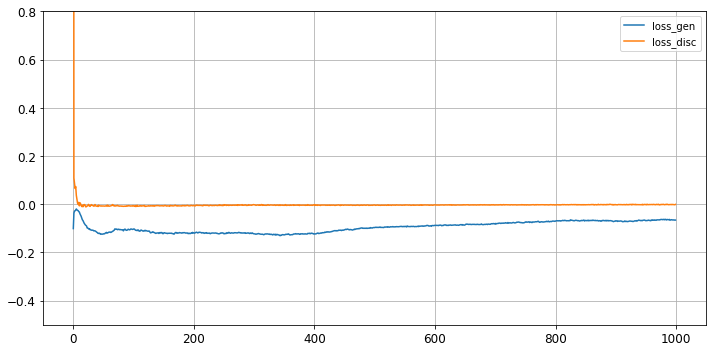

Predicted Values: (1000, 2)
save latent space


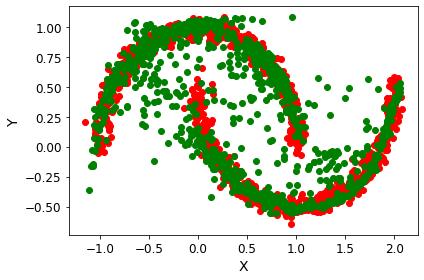

save countour line


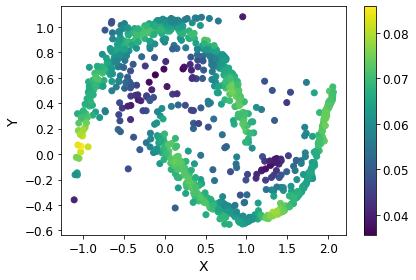

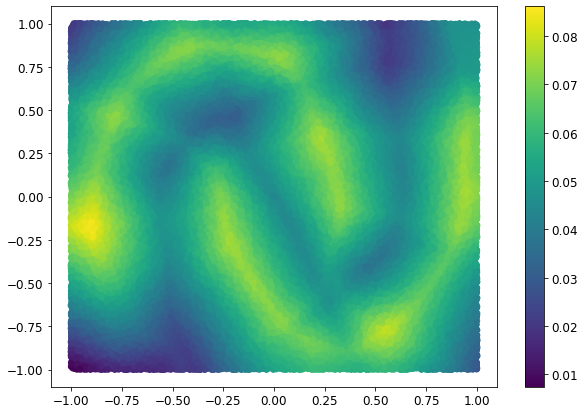

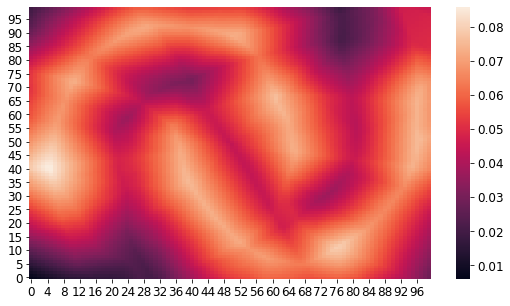

Epoch 1001/8000
critic: -0.000623 - generator: -0.063655 - 0s
Epoch 1002/8000
critic: -0.001413 - generator: -0.064765 - 0s
Epoch 1003/8000
critic: -0.001214 - generator: -0.063234 - 0s
Epoch 1004/8000
critic: -0.000274 - generator: -0.064853 - 0s
Epoch 1005/8000
critic: -0.001327 - generator: -0.065616 - 0s
Epoch 1006/8000
critic: -0.001551 - generator: -0.063959 - 0s
Epoch 1007/8000
critic: -0.002281 - generator: -0.065527 - 0s
Epoch 1008/8000
critic: -0.000180 - generator: -0.064453 - 1s
Epoch 1009/8000
critic: -0.001349 - generator: -0.064271 - 1s
Epoch 1010/8000
critic: -0.000151 - generator: -0.064485 - 1s
Epoch 1011/8000
critic: -0.000615 - generator: -0.065681 - 1s
Epoch 1012/8000
critic: -0.001275 - generator: -0.065339 - 1s
Epoch 1013/8000
critic: -0.000356 - generator: -0.064681 - 1s
Epoch 1014/8000
critic: -0.001823 - generator: -0.066491 - 1s
Epoch 1015/8000
critic: -0.001812 - generator: -0.065772 - 0s
Epoch 1016/8000
critic: -0.000563 - generator: -0.063490 - 0s
Epoch 10

critic: -0.000558 - generator: -0.048713 - 1s
Epoch 1134/8000
critic: -0.001179 - generator: -0.047094 - 1s
Epoch 1135/8000
critic: -0.001525 - generator: -0.048080 - 1s
Epoch 1136/8000
critic: -0.001178 - generator: -0.046945 - 1s
Epoch 1137/8000
critic: -0.000779 - generator: -0.046975 - 1s
Epoch 1138/8000
critic: -0.000503 - generator: -0.047471 - 0s
Epoch 1139/8000
critic: -0.000076 - generator: -0.047776 - 1s
Epoch 1140/8000
critic: 0.000918 - generator: -0.045359 - 0s
Epoch 1141/8000
critic: -0.000960 - generator: -0.047403 - 0s
Epoch 1142/8000
critic: -0.001337 - generator: -0.045664 - 0s
Epoch 1143/8000
critic: -0.000805 - generator: -0.045931 - 1s
Epoch 1144/8000
critic: -0.000773 - generator: -0.045564 - 1s
Epoch 1145/8000
critic: 0.000020 - generator: -0.044188 - 1s
Epoch 1146/8000
critic: -0.000924 - generator: -0.046570 - 0s
Epoch 1147/8000
critic: -0.000569 - generator: -0.047595 - 0s
Epoch 1148/8000
critic: -0.001697 - generator: -0.048580 - 0s
Epoch 1149/8000
critic: -0

critic: -0.000270 - generator: -0.042528 - 0s
Epoch 1267/8000
critic: -0.000571 - generator: -0.042222 - 0s
Epoch 1268/8000
critic: -0.001356 - generator: -0.041689 - 0s
Epoch 1269/8000
critic: -0.001167 - generator: -0.041739 - 0s
Epoch 1270/8000
critic: -0.000940 - generator: -0.043088 - 0s
Epoch 1271/8000
critic: 0.000122 - generator: -0.043497 - 0s
Epoch 1272/8000
critic: -0.000652 - generator: -0.042295 - 0s
Epoch 1273/8000
critic: 0.000137 - generator: -0.040376 - 0s
Epoch 1274/8000
critic: -0.000542 - generator: -0.038664 - 0s
Epoch 1275/8000
critic: -0.001142 - generator: -0.039834 - 0s
Epoch 1276/8000
critic: -0.000340 - generator: -0.042116 - 0s
Epoch 1277/8000
critic: -0.000286 - generator: -0.040717 - 0s
Epoch 1278/8000
critic: -0.001152 - generator: -0.041566 - 0s
Epoch 1279/8000
critic: -0.000454 - generator: -0.038092 - 0s
Epoch 1280/8000
critic: 0.000391 - generator: -0.037657 - 0s
Epoch 1281/8000
critic: -0.000076 - generator: -0.037487 - 0s
Epoch 1282/8000
critic: -0.

critic: 0.000784 - generator: -0.036360 - 0s
Epoch 1401/8000
critic: 0.000317 - generator: -0.035067 - 0s
Epoch 1402/8000
critic: 0.001654 - generator: -0.035203 - 0s
Epoch 1403/8000
critic: 0.000451 - generator: -0.033361 - 0s
Epoch 1404/8000
critic: -0.000254 - generator: -0.033627 - 0s
Epoch 1405/8000
critic: -0.000034 - generator: -0.033033 - 0s
Epoch 1406/8000
critic: -0.000047 - generator: -0.032342 - 0s
Epoch 1407/8000
critic: 0.000706 - generator: -0.032622 - 0s
Epoch 1408/8000
critic: 0.001269 - generator: -0.033996 - 0s
Epoch 1409/8000
critic: 0.000008 - generator: -0.035373 - 0s
Epoch 1410/8000
critic: 0.000621 - generator: -0.032600 - 0s
Epoch 1411/8000
critic: -0.000198 - generator: -0.032525 - 0s
Epoch 1412/8000
critic: 0.000480 - generator: -0.034119 - 0s
Epoch 1413/8000
critic: 0.001061 - generator: -0.032407 - 0s
Epoch 1414/8000
critic: 0.001676 - generator: -0.032337 - 0s
Epoch 1415/8000
critic: 0.000870 - generator: -0.034083 - 0s
Epoch 1416/8000
critic: 0.000095 - g

critic: 0.000551 - generator: -0.031233 - 0s
Epoch 1535/8000
critic: 0.000457 - generator: -0.033109 - 0s
Epoch 1536/8000
critic: -0.000428 - generator: -0.033412 - 0s
Epoch 1537/8000
critic: 0.001062 - generator: -0.032734 - 0s
Epoch 1538/8000
critic: 0.000487 - generator: -0.033809 - 0s
Epoch 1539/8000
critic: -0.000154 - generator: -0.031906 - 0s
Epoch 1540/8000
critic: -0.000537 - generator: -0.030527 - 0s
Epoch 1541/8000
critic: 0.001900 - generator: -0.033713 - 0s
Epoch 1542/8000
critic: 0.001139 - generator: -0.032758 - 0s
Epoch 1543/8000
critic: 0.000400 - generator: -0.030348 - 0s
Epoch 1544/8000
critic: -0.000186 - generator: -0.032387 - 0s
Epoch 1545/8000
critic: 0.001194 - generator: -0.031742 - 0s
Epoch 1546/8000
critic: 0.001083 - generator: -0.030071 - 0s
Epoch 1547/8000
critic: 0.001370 - generator: -0.031067 - 0s
Epoch 1548/8000
critic: 0.001442 - generator: -0.032956 - 0s
Epoch 1549/8000
critic: 0.000659 - generator: -0.032664 - 0s
Epoch 1550/8000
critic: 0.000883 - g

critic: 0.000614 - generator: -0.030651 - 0s
Epoch 1670/8000
critic: 0.001218 - generator: -0.031401 - 0s
Epoch 1671/8000
critic: 0.001294 - generator: -0.033308 - 0s
Epoch 1672/8000
critic: 0.000297 - generator: -0.032449 - 0s
Epoch 1673/8000
critic: 0.001054 - generator: -0.033497 - 0s
Epoch 1674/8000
critic: 0.000187 - generator: -0.034163 - 0s
Epoch 1675/8000
critic: 0.000979 - generator: -0.034375 - 0s
Epoch 1676/8000
critic: 0.000493 - generator: -0.033626 - 0s
Epoch 1677/8000
critic: 0.000955 - generator: -0.033178 - 0s
Epoch 1678/8000
critic: 0.000980 - generator: -0.032379 - 0s
Epoch 1679/8000
critic: 0.001511 - generator: -0.034110 - 0s
Epoch 1680/8000
critic: 0.001145 - generator: -0.033137 - 0s
Epoch 1681/8000
critic: 0.000322 - generator: -0.031297 - 0s
Epoch 1682/8000
critic: 0.001030 - generator: -0.031258 - 0s
Epoch 1683/8000
critic: 0.000971 - generator: -0.035668 - 0s
Epoch 1684/8000
critic: 0.000739 - generator: -0.033565 - 0s
Epoch 1685/8000
critic: 0.000175 - gener

critic: 0.001836 - generator: -0.033156 - 0s
Epoch 1805/8000
critic: 0.001541 - generator: -0.033226 - 0s
Epoch 1806/8000
critic: 0.001143 - generator: -0.033512 - 0s
Epoch 1807/8000
critic: 0.001407 - generator: -0.034205 - 0s
Epoch 1808/8000
critic: -0.000012 - generator: -0.035323 - 0s
Epoch 1809/8000
critic: 0.001071 - generator: -0.034480 - 0s
Epoch 1810/8000
critic: 0.001369 - generator: -0.033828 - 0s
Epoch 1811/8000
critic: 0.001756 - generator: -0.034285 - 0s
Epoch 1812/8000
critic: 0.001074 - generator: -0.034010 - 0s
Epoch 1813/8000
critic: 0.000733 - generator: -0.033605 - 0s
Epoch 1814/8000
critic: 0.003115 - generator: -0.034173 - 0s
Epoch 1815/8000
critic: 0.001650 - generator: -0.031631 - 0s
Epoch 1816/8000
critic: 0.001448 - generator: -0.034970 - 0s
Epoch 1817/8000
critic: 0.001379 - generator: -0.033067 - 0s
Epoch 1818/8000
critic: 0.001809 - generator: -0.033725 - 0s
Epoch 1819/8000
critic: 0.001127 - generator: -0.033576 - 0s
Epoch 1820/8000
critic: 0.000829 - gene

critic: 0.000432 - generator: -0.036873 - 1s
Epoch 1940/8000
critic: 0.001214 - generator: -0.039428 - 1s
Epoch 1941/8000
critic: 0.001121 - generator: -0.040197 - 1s
Epoch 1942/8000
critic: 0.003340 - generator: -0.039600 - 1s
Epoch 1943/8000
critic: 0.002509 - generator: -0.037681 - 1s
Epoch 1944/8000
critic: 0.002014 - generator: -0.035541 - 1s
Epoch 1945/8000
critic: 0.001183 - generator: -0.038635 - 1s
Epoch 1946/8000
critic: 0.002085 - generator: -0.037354 - 1s
Epoch 1947/8000
critic: 0.001627 - generator: -0.036230 - 1s
Epoch 1948/8000
critic: 0.003648 - generator: -0.038038 - 1s
Epoch 1949/8000
critic: 0.001925 - generator: -0.040148 - 1s
Epoch 1950/8000
critic: 0.003634 - generator: -0.038658 - 1s
Epoch 1951/8000
critic: 0.001486 - generator: -0.040405 - 1s
Epoch 1952/8000
critic: 0.002063 - generator: -0.042194 - 1s
Epoch 1953/8000
critic: 0.000727 - generator: -0.042930 - 1s
Epoch 1954/8000
critic: 0.001853 - generator: -0.038061 - 1s
Epoch 1955/8000
critic: 0.002040 - gener

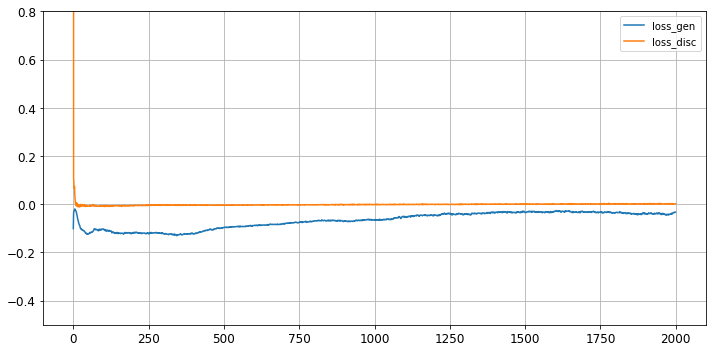

Predicted Values: (1000, 2)
save latent space


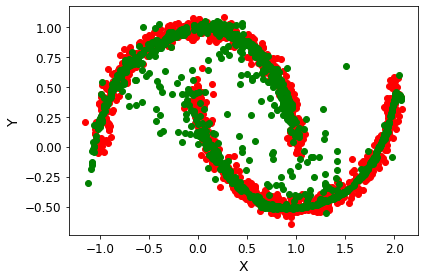

save countour line


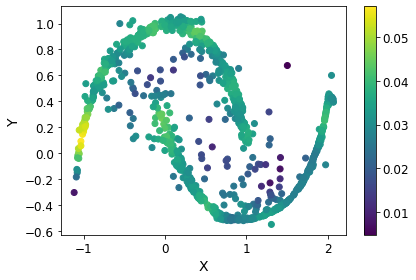

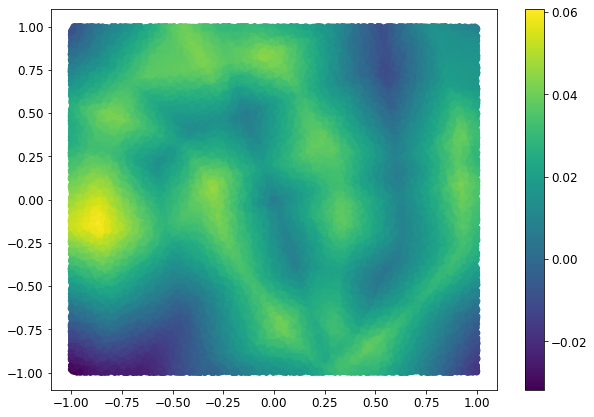

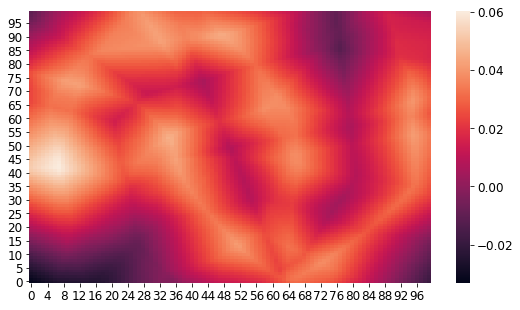

Epoch 2001/8000
critic: 0.001461 - generator: -0.032148 - 1s
Epoch 2002/8000
critic: 0.002294 - generator: -0.034132 - 1s
Epoch 2003/8000
critic: 0.000610 - generator: -0.033829 - 1s
Epoch 2004/8000
critic: 0.000643 - generator: -0.034319 - 1s
Epoch 2005/8000
critic: 0.002418 - generator: -0.032881 - 1s
Epoch 2006/8000
critic: 0.001718 - generator: -0.035003 - 1s
Epoch 2007/8000
critic: 0.001637 - generator: -0.032995 - 1s
Epoch 2008/8000
critic: 0.003008 - generator: -0.033545 - 1s
Epoch 2009/8000
critic: 0.001870 - generator: -0.032892 - 1s
Epoch 2010/8000
critic: 0.001165 - generator: -0.032486 - 1s
Epoch 2011/8000
critic: 0.002110 - generator: -0.032101 - 1s
Epoch 2012/8000
critic: 0.001800 - generator: -0.033471 - 1s
Epoch 2013/8000
critic: 0.002462 - generator: -0.033522 - 1s
Epoch 2014/8000
critic: 0.002686 - generator: -0.032752 - 1s
Epoch 2015/8000
critic: 0.003467 - generator: -0.034436 - 1s
Epoch 2016/8000
critic: 0.001582 - generator: -0.032758 - 1s
Epoch 2017/8000
critic: 

critic: 0.000600 - generator: -0.021934 - 1s
Epoch 2137/8000
critic: 0.000290 - generator: -0.020982 - 1s
Epoch 2138/8000
critic: 0.001912 - generator: -0.019840 - 1s
Epoch 2139/8000
critic: 0.001969 - generator: -0.022006 - 1s
Epoch 2140/8000
critic: 0.001088 - generator: -0.022980 - 1s
Epoch 2141/8000
critic: 0.001108 - generator: -0.023458 - 1s
Epoch 2142/8000
critic: 0.001377 - generator: -0.023957 - 1s
Epoch 2143/8000
critic: 0.002707 - generator: -0.022461 - 1s
Epoch 2144/8000
critic: 0.002264 - generator: -0.021592 - 1s
Epoch 2145/8000
critic: 0.001020 - generator: -0.022072 - 1s
Epoch 2146/8000
critic: 0.001085 - generator: -0.022828 - 1s
Epoch 2147/8000
critic: 0.002385 - generator: -0.022931 - 1s
Epoch 2148/8000
critic: 0.001124 - generator: -0.022646 - 1s
Epoch 2149/8000
critic: 0.001552 - generator: -0.024026 - 1s
Epoch 2150/8000
critic: 0.004434 - generator: -0.023502 - 1s
Epoch 2151/8000
critic: 0.003254 - generator: -0.025320 - 1s
Epoch 2152/8000
critic: 0.001339 - gener

critic: 0.001690 - generator: -0.024584 - 1s
Epoch 2272/8000
critic: 0.002107 - generator: -0.024126 - 1s
Epoch 2273/8000
critic: 0.002614 - generator: -0.023526 - 1s
Epoch 2274/8000
critic: 0.001886 - generator: -0.022573 - 1s
Epoch 2275/8000
critic: 0.001610 - generator: -0.024101 - 1s
Epoch 2276/8000
critic: 0.002888 - generator: -0.022666 - 1s
Epoch 2277/8000
critic: 0.002689 - generator: -0.018494 - 1s
Epoch 2278/8000
critic: 0.003201 - generator: -0.022715 - 1s
Epoch 2279/8000
critic: 0.001888 - generator: -0.021312 - 1s
Epoch 2280/8000
critic: 0.001221 - generator: -0.020286 - 1s
Epoch 2281/8000
critic: 0.002660 - generator: -0.019009 - 1s
Epoch 2282/8000
critic: 0.003097 - generator: -0.020099 - 1s
Epoch 2283/8000
critic: 0.002266 - generator: -0.020030 - 1s
Epoch 2284/8000
critic: 0.002690 - generator: -0.017003 - 1s
Epoch 2285/8000
critic: 0.002936 - generator: -0.017452 - 1s
Epoch 2286/8000
critic: 0.003481 - generator: -0.018075 - 1s
Epoch 2287/8000
critic: 0.003163 - gener

critic: 0.001348 - generator: -0.010204 - 1s
Epoch 2407/8000
critic: 0.002503 - generator: -0.008143 - 1s
Epoch 2408/8000
critic: 0.001740 - generator: -0.007504 - 1s
Epoch 2409/8000
critic: 0.000632 - generator: -0.009145 - 1s
Epoch 2410/8000
critic: 0.001509 - generator: -0.012456 - 1s
Epoch 2411/8000
critic: 0.004404 - generator: -0.009719 - 1s
Epoch 2412/8000
critic: 0.004113 - generator: -0.010950 - 1s
Epoch 2413/8000
critic: 0.001376 - generator: -0.009588 - 1s
Epoch 2414/8000
critic: 0.002109 - generator: -0.013523 - 1s
Epoch 2415/8000
critic: 0.003374 - generator: -0.013945 - 1s
Epoch 2416/8000
critic: 0.002343 - generator: -0.011217 - 1s
Epoch 2417/8000
critic: 0.002018 - generator: -0.011354 - 1s
Epoch 2418/8000
critic: 0.001369 - generator: -0.011214 - 1s
Epoch 2419/8000
critic: 0.002033 - generator: -0.009147 - 1s
Epoch 2420/8000
critic: 0.002218 - generator: -0.010561 - 1s
Epoch 2421/8000
critic: 0.001670 - generator: -0.008240 - 1s
Epoch 2422/8000
critic: 0.002400 - gener

critic: 0.001011 - generator: -0.003850 - 1s
Epoch 2542/8000
critic: 0.001328 - generator: -0.005502 - 1s
Epoch 2543/8000
critic: 0.001149 - generator: -0.006611 - 1s
Epoch 2544/8000
critic: 0.001062 - generator: -0.003752 - 1s
Epoch 2545/8000
critic: 0.002543 - generator: -0.005773 - 1s
Epoch 2546/8000
critic: 0.000850 - generator: -0.003301 - 1s
Epoch 2547/8000
critic: 0.001636 - generator: -0.002086 - 1s
Epoch 2548/8000
critic: 0.001443 - generator: -0.004338 - 1s
Epoch 2549/8000
critic: 0.001615 - generator: -0.003255 - 1s
Epoch 2550/8000
critic: 0.003032 - generator: -0.003017 - 1s
Epoch 2551/8000
critic: 0.002538 - generator: -0.000956 - 1s
Epoch 2552/8000
critic: 0.001753 - generator: -0.005403 - 1s
Epoch 2553/8000
critic: 0.001450 - generator: -0.008092 - 1s
Epoch 2554/8000
critic: 0.001609 - generator: -0.005750 - 1s
Epoch 2555/8000
critic: 0.002170 - generator: -0.001740 - 1s
Epoch 2556/8000
critic: 0.002457 - generator: -0.006370 - 1s
Epoch 2557/8000
critic: 0.002200 - gener

critic: 0.001525 - generator: 0.003819 - 1s
Epoch 2678/8000
critic: 0.001289 - generator: 0.002705 - 1s
Epoch 2679/8000
critic: 0.001161 - generator: -0.000740 - 1s
Epoch 2680/8000
critic: 0.001735 - generator: 0.001067 - 1s
Epoch 2681/8000
critic: 0.001898 - generator: 0.000228 - 1s
Epoch 2682/8000
critic: 0.001574 - generator: 0.001606 - 1s
Epoch 2683/8000
critic: 0.001321 - generator: -0.000301 - 1s
Epoch 2684/8000
critic: 0.001249 - generator: 0.003539 - 1s
Epoch 2685/8000
critic: 0.000833 - generator: 0.002596 - 1s
Epoch 2686/8000
critic: 0.001078 - generator: 0.003344 - 1s
Epoch 2687/8000
critic: 0.001640 - generator: 0.003349 - 1s
Epoch 2688/8000
critic: 0.001351 - generator: 0.000104 - 1s
Epoch 2689/8000
critic: 0.000633 - generator: 0.005802 - 1s
Epoch 2690/8000
critic: 0.000046 - generator: 0.002426 - 1s
Epoch 2691/8000
critic: 0.000969 - generator: 0.001159 - 1s
Epoch 2692/8000
critic: 0.002458 - generator: 0.000556 - 1s
Epoch 2693/8000
critic: 0.001785 - generator: 0.001733

critic: 0.000664 - generator: 0.003963 - 1s
Epoch 2815/8000
critic: 0.000025 - generator: 0.005521 - 1s
Epoch 2816/8000
critic: 0.001137 - generator: 0.006059 - 1s
Epoch 2817/8000
critic: 0.001028 - generator: 0.007403 - 1s
Epoch 2818/8000
critic: 0.001556 - generator: 0.007301 - 1s
Epoch 2819/8000
critic: 0.001231 - generator: 0.008314 - 1s
Epoch 2820/8000
critic: 0.000830 - generator: 0.006570 - 1s
Epoch 2821/8000
critic: 0.000541 - generator: 0.005399 - 1s
Epoch 2822/8000
critic: 0.001125 - generator: 0.004786 - 1s
Epoch 2823/8000
critic: 0.001418 - generator: 0.008766 - 1s
Epoch 2824/8000
critic: 0.001204 - generator: 0.006004 - 1s
Epoch 2825/8000
critic: 0.001282 - generator: 0.008802 - 1s
Epoch 2826/8000
critic: 0.002195 - generator: 0.006688 - 1s
Epoch 2827/8000
critic: 0.000529 - generator: 0.007081 - 1s
Epoch 2828/8000
critic: 0.000532 - generator: 0.004770 - 1s
Epoch 2829/8000
critic: 0.000986 - generator: 0.008233 - 1s
Epoch 2830/8000
critic: 0.001367 - generator: 0.008109 -

critic: 0.000645 - generator: 0.015343 - 1s
Epoch 2952/8000
critic: 0.000271 - generator: 0.013753 - 1s
Epoch 2953/8000
critic: 0.000618 - generator: 0.012385 - 1s
Epoch 2954/8000
critic: 0.001230 - generator: 0.014279 - 1s
Epoch 2955/8000
critic: 0.001367 - generator: 0.014548 - 1s
Epoch 2956/8000
critic: 0.000345 - generator: 0.014759 - 1s
Epoch 2957/8000
critic: 0.002489 - generator: 0.013166 - 1s
Epoch 2958/8000
critic: 0.000732 - generator: 0.012478 - 1s
Epoch 2959/8000
critic: 0.001283 - generator: 0.013152 - 1s
Epoch 2960/8000
critic: 0.000798 - generator: 0.012063 - 1s
Epoch 2961/8000
critic: 0.000408 - generator: 0.013217 - 1s
Epoch 2962/8000
critic: 0.001497 - generator: 0.016089 - 1s
Epoch 2963/8000
critic: 0.001176 - generator: 0.013947 - 1s
Epoch 2964/8000
critic: 0.001796 - generator: 0.012879 - 1s
Epoch 2965/8000
critic: 0.001678 - generator: 0.011698 - 1s
Epoch 2966/8000
critic: 0.000190 - generator: 0.013353 - 1s
Epoch 2967/8000
critic: 0.001387 - generator: 0.013182 -

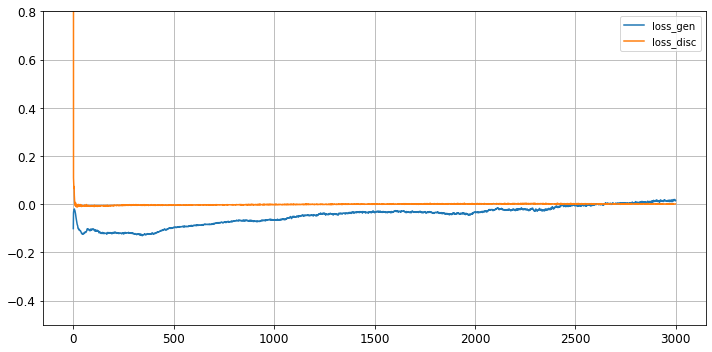

Predicted Values: (1000, 2)
save latent space


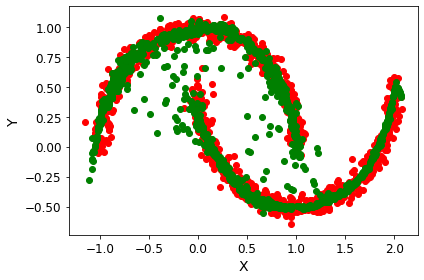

save countour line


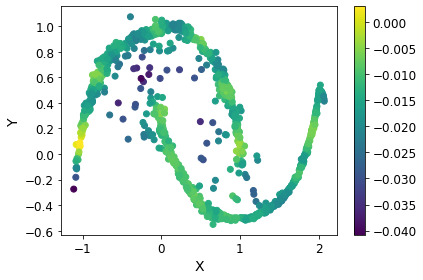

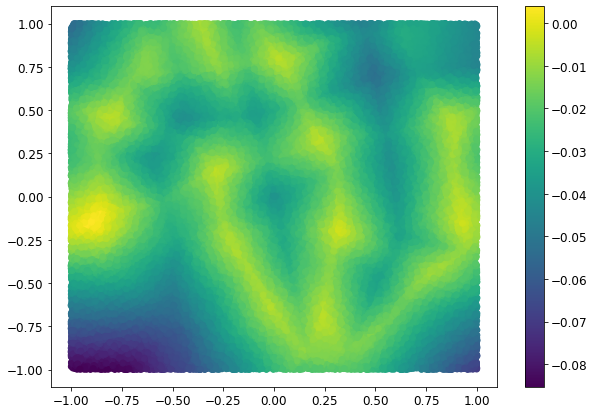

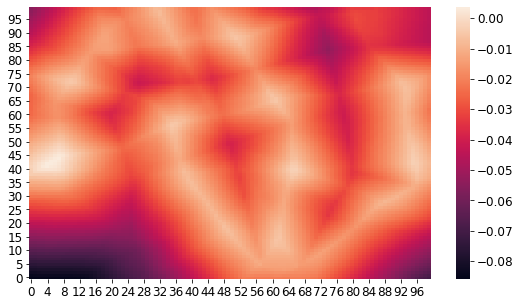

Epoch 3001/8000
critic: 0.001173 - generator: 0.014977 - 1s
Epoch 3002/8000
critic: 0.001301 - generator: 0.016365 - 1s
Epoch 3003/8000
critic: 0.000981 - generator: 0.014593 - 1s
Epoch 3004/8000
critic: 0.001007 - generator: 0.015002 - 1s
Epoch 3005/8000
critic: 0.000962 - generator: 0.014273 - 1s
Epoch 3006/8000
critic: 0.001622 - generator: 0.013722 - 1s
Epoch 3007/8000
critic: 0.000490 - generator: 0.015599 - 1s
Epoch 3008/8000
critic: 0.000903 - generator: 0.014902 - 1s
Epoch 3009/8000
critic: 0.001041 - generator: 0.016350 - 1s
Epoch 3010/8000
critic: 0.000732 - generator: 0.015473 - 1s
Epoch 3011/8000
critic: 0.001447 - generator: 0.015277 - 1s
Epoch 3012/8000
critic: 0.001340 - generator: 0.014666 - 1s
Epoch 3013/8000
critic: 0.001191 - generator: 0.013701 - 1s
Epoch 3014/8000
critic: 0.001627 - generator: 0.016456 - 1s
Epoch 3015/8000
critic: 0.002266 - generator: 0.011788 - 2s
Epoch 3016/8000
critic: 0.000654 - generator: 0.015780 - 1s
Epoch 3017/8000
critic: 0.001342 - gener

critic: 0.001410 - generator: 0.020572 - 1s
Epoch 3139/8000
critic: 0.000843 - generator: 0.018149 - 1s
Epoch 3140/8000
critic: 0.001924 - generator: 0.019517 - 1s
Epoch 3141/8000
critic: 0.000919 - generator: 0.019859 - 1s
Epoch 3142/8000
critic: 0.001440 - generator: 0.019356 - 1s
Epoch 3143/8000
critic: 0.000499 - generator: 0.022920 - 1s
Epoch 3144/8000
critic: 0.001000 - generator: 0.018276 - 1s
Epoch 3145/8000
critic: 0.000819 - generator: 0.019479 - 1s
Epoch 3146/8000
critic: 0.000890 - generator: 0.020813 - 1s
Epoch 3147/8000
critic: 0.000884 - generator: 0.021116 - 1s
Epoch 3148/8000
critic: 0.000911 - generator: 0.020847 - 1s
Epoch 3149/8000
critic: 0.002211 - generator: 0.020592 - 1s
Epoch 3150/8000
critic: 0.000901 - generator: 0.022732 - 1s
Epoch 3151/8000
critic: 0.000697 - generator: 0.021680 - 1s
Epoch 3152/8000
critic: 0.001508 - generator: 0.022061 - 1s
Epoch 3153/8000
critic: 0.002050 - generator: 0.019614 - 1s
Epoch 3154/8000
critic: 0.001216 - generator: 0.019678 -

critic: 0.000997 - generator: 0.016318 - 1s
Epoch 3276/8000
critic: 0.000874 - generator: 0.015086 - 1s
Epoch 3277/8000
critic: 0.000903 - generator: 0.012192 - 1s
Epoch 3278/8000
critic: 0.000674 - generator: 0.013476 - 1s
Epoch 3279/8000
critic: 0.001501 - generator: 0.014577 - 1s
Epoch 3280/8000
critic: 0.000269 - generator: 0.011513 - 1s
Epoch 3281/8000
critic: 0.001050 - generator: 0.010687 - 1s
Epoch 3282/8000
critic: 0.000751 - generator: 0.012295 - 1s
Epoch 3283/8000
critic: 0.001275 - generator: 0.012013 - 1s
Epoch 3284/8000
critic: 0.000558 - generator: 0.013230 - 1s
Epoch 3285/8000
critic: 0.000064 - generator: 0.014550 - 1s
Epoch 3286/8000
critic: 0.000667 - generator: 0.011486 - 1s
Epoch 3287/8000
critic: 0.001148 - generator: 0.011144 - 1s
Epoch 3288/8000
critic: 0.000953 - generator: 0.013292 - 1s
Epoch 3289/8000
critic: 0.001206 - generator: 0.011965 - 1s
Epoch 3290/8000
critic: 0.000919 - generator: 0.015384 - 1s
Epoch 3291/8000
critic: 0.001703 - generator: 0.015870 -

critic: 0.001057 - generator: 0.015744 - 1s
Epoch 3413/8000
critic: 0.000957 - generator: 0.015179 - 1s
Epoch 3414/8000
critic: 0.000120 - generator: 0.012705 - 1s
Epoch 3415/8000
critic: 0.000866 - generator: 0.018803 - 1s
Epoch 3416/8000
critic: 0.000638 - generator: 0.014926 - 1s
Epoch 3417/8000
critic: 0.001564 - generator: 0.013897 - 1s
Epoch 3418/8000
critic: 0.000576 - generator: 0.016291 - 1s
Epoch 3419/8000
critic: 0.000715 - generator: 0.012831 - 1s
Epoch 3420/8000
critic: 0.000991 - generator: 0.012897 - 1s
Epoch 3421/8000
critic: 0.000636 - generator: 0.012726 - 1s
Epoch 3422/8000
critic: 0.000862 - generator: 0.014234 - 1s
Epoch 3423/8000
critic: 0.000146 - generator: 0.015489 - 1s
Epoch 3424/8000
critic: 0.001158 - generator: 0.015948 - 1s
Epoch 3425/8000
critic: 0.000889 - generator: 0.010775 - 1s
Epoch 3426/8000
critic: -0.000017 - generator: 0.011997 - 1s
Epoch 3427/8000
critic: 0.000185 - generator: 0.015516 - 1s
Epoch 3428/8000
critic: 0.000440 - generator: 0.015649 

critic: 0.001310 - generator: 0.014280 - 1s
Epoch 3550/8000
critic: 0.001114 - generator: 0.011076 - 1s
Epoch 3551/8000
critic: 0.000460 - generator: 0.011962 - 1s
Epoch 3552/8000
critic: 0.001087 - generator: 0.013390 - 1s
Epoch 3553/8000
critic: 0.000646 - generator: 0.012744 - 1s
Epoch 3554/8000
critic: 0.000082 - generator: 0.009978 - 1s
Epoch 3555/8000
critic: -0.000137 - generator: 0.009562 - 1s
Epoch 3556/8000
critic: 0.001041 - generator: 0.012655 - 1s
Epoch 3557/8000
critic: 0.000380 - generator: 0.014165 - 1s
Epoch 3558/8000
critic: 0.000278 - generator: 0.012291 - 1s
Epoch 3559/8000
critic: 0.001340 - generator: 0.009435 - 1s
Epoch 3560/8000
critic: 0.001299 - generator: 0.011527 - 1s
Epoch 3561/8000
critic: 0.001296 - generator: 0.008948 - 1s
Epoch 3562/8000
critic: 0.000810 - generator: 0.010273 - 1s
Epoch 3563/8000
critic: 0.000709 - generator: 0.014644 - 1s
Epoch 3564/8000
critic: 0.000509 - generator: 0.013471 - 1s
Epoch 3565/8000
critic: 0.000705 - generator: 0.011947 

critic: 0.000838 - generator: 0.009182 - 1s
Epoch 3687/8000
critic: 0.000663 - generator: 0.009041 - 1s
Epoch 3688/8000
critic: 0.001072 - generator: 0.009046 - 1s
Epoch 3689/8000
critic: 0.000110 - generator: 0.014456 - 1s
Epoch 3690/8000
critic: 0.000716 - generator: 0.009544 - 1s
Epoch 3691/8000
critic: 0.000275 - generator: 0.006333 - 1s
Epoch 3692/8000
critic: 0.000104 - generator: 0.009436 - 1s
Epoch 3693/8000
critic: 0.001000 - generator: 0.007208 - 1s
Epoch 3694/8000
critic: 0.000682 - generator: 0.008148 - 1s
Epoch 3695/8000
critic: 0.000726 - generator: 0.007745 - 1s
Epoch 3696/8000
critic: 0.000398 - generator: 0.009845 - 1s
Epoch 3697/8000
critic: 0.000370 - generator: 0.008375 - 1s
Epoch 3698/8000
critic: 0.000706 - generator: 0.011082 - 1s
Epoch 3699/8000
critic: 0.000985 - generator: 0.008230 - 1s
Epoch 3700/8000
critic: 0.000387 - generator: 0.010409 - 1s
Epoch 3701/8000
critic: 0.000566 - generator: 0.012999 - 1s
Epoch 3702/8000
critic: 0.000410 - generator: 0.006765 -

critic: 0.000476 - generator: 0.015039 - 1s
Epoch 3824/8000
critic: 0.000289 - generator: 0.017438 - 1s
Epoch 3825/8000
critic: 0.000458 - generator: 0.014706 - 1s
Epoch 3826/8000
critic: 0.000297 - generator: 0.015208 - 1s
Epoch 3827/8000
critic: 0.000535 - generator: 0.013697 - 1s
Epoch 3828/8000
critic: 0.000398 - generator: 0.014724 - 1s
Epoch 3829/8000
critic: 0.000351 - generator: 0.013948 - 1s
Epoch 3830/8000
critic: 0.000596 - generator: 0.013686 - 1s
Epoch 3831/8000
critic: -0.000091 - generator: 0.015815 - 1s
Epoch 3832/8000
critic: 0.000891 - generator: 0.015274 - 1s
Epoch 3833/8000
critic: 0.000868 - generator: 0.015582 - 1s
Epoch 3834/8000
critic: 0.000428 - generator: 0.013468 - 1s
Epoch 3835/8000
critic: 0.000239 - generator: 0.014877 - 1s
Epoch 3836/8000
critic: 0.000738 - generator: 0.019399 - 1s
Epoch 3837/8000
critic: 0.000694 - generator: 0.010131 - 1s
Epoch 3838/8000
critic: 0.000541 - generator: 0.014010 - 1s
Epoch 3839/8000
critic: 0.000110 - generator: 0.015856 

critic: 0.000425 - generator: 0.018621 - 1s
Epoch 3961/8000
critic: 0.000228 - generator: 0.016910 - 1s
Epoch 3962/8000
critic: 0.001010 - generator: 0.018455 - 1s
Epoch 3963/8000
critic: 0.000681 - generator: 0.014200 - 1s
Epoch 3964/8000
critic: 0.000403 - generator: 0.016035 - 1s
Epoch 3965/8000
critic: 0.000451 - generator: 0.017336 - 1s
Epoch 3966/8000
critic: -0.000130 - generator: 0.016199 - 1s
Epoch 3967/8000
critic: 0.000425 - generator: 0.015165 - 1s
Epoch 3968/8000
critic: -0.000081 - generator: 0.016312 - 1s
Epoch 3969/8000
critic: 0.000055 - generator: 0.018867 - 1s
Epoch 3970/8000
critic: 0.000247 - generator: 0.017037 - 1s
Epoch 3971/8000
critic: 0.000352 - generator: 0.015484 - 1s
Epoch 3972/8000
critic: 0.000111 - generator: 0.017092 - 1s
Epoch 3973/8000
critic: 0.000618 - generator: 0.014645 - 1s
Epoch 3974/8000
critic: 0.000661 - generator: 0.017991 - 1s
Epoch 3975/8000
critic: 0.000585 - generator: 0.014883 - 1s
Epoch 3976/8000
critic: 0.000379 - generator: 0.016112

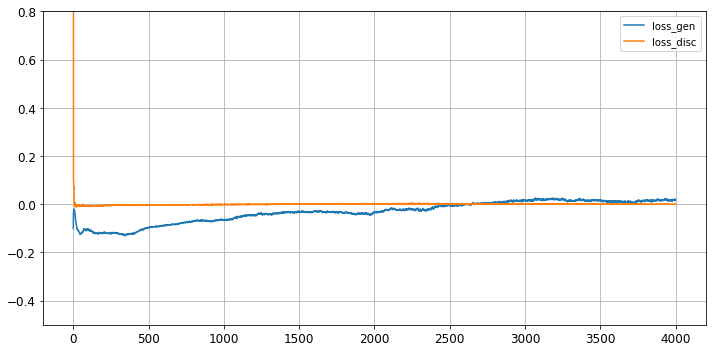

Predicted Values: (1000, 2)
save latent space


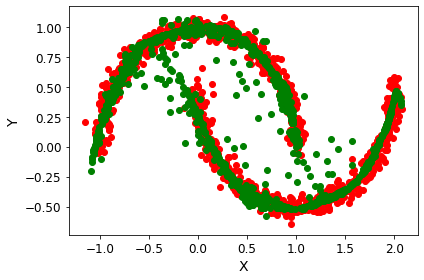

save countour line


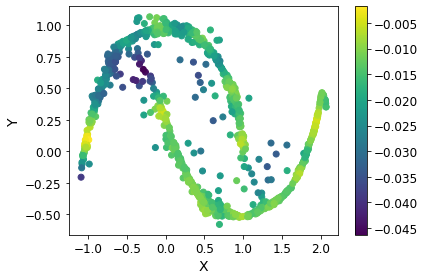

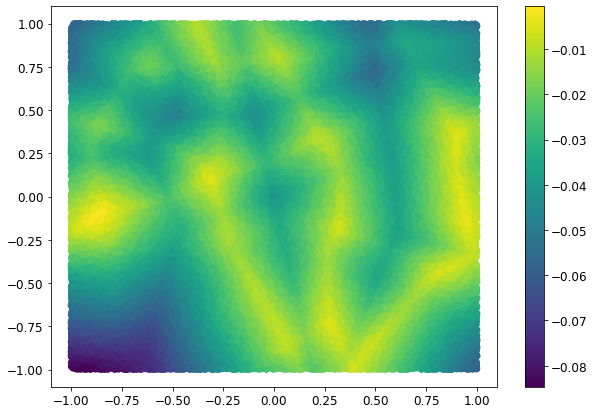

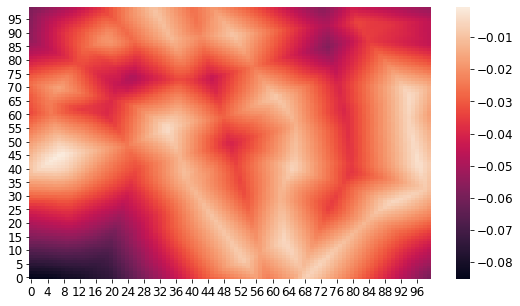

Epoch 4001/8000
critic: 0.000411 - generator: 0.017311 - 1s
Epoch 4002/8000
critic: 0.000287 - generator: 0.016991 - 1s
Epoch 4003/8000
critic: 0.000157 - generator: 0.014139 - 1s
Epoch 4004/8000
critic: 0.000254 - generator: 0.016186 - 1s
Epoch 4005/8000
critic: 0.000843 - generator: 0.016981 - 1s
Epoch 4006/8000
critic: 0.001508 - generator: 0.019192 - 1s
Epoch 4007/8000
critic: 0.000871 - generator: 0.013184 - 1s
Epoch 4008/8000
critic: 0.000673 - generator: 0.015553 - 1s
Epoch 4009/8000
critic: 0.000154 - generator: 0.019009 - 1s
Epoch 4010/8000
critic: 0.000137 - generator: 0.020142 - 1s
Epoch 4011/8000
critic: 0.000597 - generator: 0.017380 - 1s
Epoch 4012/8000
critic: 0.000673 - generator: 0.019256 - 1s
Epoch 4013/8000
critic: 0.000620 - generator: 0.017967 - 1s
Epoch 4014/8000
critic: 0.000386 - generator: 0.016613 - 1s
Epoch 4015/8000
critic: 0.000180 - generator: 0.018333 - 1s
Epoch 4016/8000
critic: 0.000312 - generator: 0.016664 - 1s
Epoch 4017/8000
critic: 0.000684 - gener

critic: 0.000138 - generator: 0.022570 - 1s
Epoch 4139/8000
critic: 0.000482 - generator: 0.024306 - 1s
Epoch 4140/8000
critic: -0.000244 - generator: 0.016236 - 1s
Epoch 4141/8000
critic: 0.000376 - generator: 0.021568 - 1s
Epoch 4142/8000
critic: 0.000758 - generator: 0.024800 - 1s
Epoch 4143/8000
critic: 0.000987 - generator: 0.020488 - 1s
Epoch 4144/8000
critic: 0.000852 - generator: 0.025936 - 1s
Epoch 4145/8000
critic: 0.001141 - generator: 0.023668 - 1s
Epoch 4146/8000
critic: 0.000152 - generator: 0.027455 - 1s
Epoch 4147/8000
critic: 0.001017 - generator: 0.029179 - 1s
Epoch 4148/8000
critic: 0.001420 - generator: 0.024336 - 1s
Epoch 4149/8000
critic: 0.000488 - generator: 0.025356 - 1s
Epoch 4150/8000
critic: 0.000984 - generator: 0.028089 - 1s
Epoch 4151/8000
critic: 0.000919 - generator: 0.022971 - 1s
Epoch 4152/8000
critic: 0.000915 - generator: 0.026047 - 1s
Epoch 4153/8000
critic: 0.000386 - generator: 0.021391 - 1s
Epoch 4154/8000
critic: 0.000610 - generator: 0.025877 

critic: 0.000284 - generator: 0.027042 - 1s
Epoch 4276/8000
critic: 0.000504 - generator: 0.027535 - 1s
Epoch 4277/8000
critic: 0.000813 - generator: 0.024853 - 1s
Epoch 4278/8000
critic: 0.001644 - generator: 0.022745 - 1s
Epoch 4279/8000
critic: 0.000699 - generator: 0.027596 - 1s
Epoch 4280/8000
critic: 0.000569 - generator: 0.029775 - 1s
Epoch 4281/8000
critic: 0.000605 - generator: 0.023079 - 1s
Epoch 4282/8000
critic: 0.001271 - generator: 0.023389 - 1s
Epoch 4283/8000
critic: 0.000786 - generator: 0.026781 - 1s
Epoch 4284/8000
critic: 0.000941 - generator: 0.026679 - 1s
Epoch 4285/8000
critic: 0.001222 - generator: 0.026893 - 1s
Epoch 4286/8000
critic: 0.001816 - generator: 0.028524 - 1s
Epoch 4287/8000
critic: 0.000754 - generator: 0.024489 - 1s
Epoch 4288/8000
critic: 0.000697 - generator: 0.024695 - 1s
Epoch 4289/8000
critic: 0.000527 - generator: 0.024692 - 1s
Epoch 4290/8000
critic: 0.001124 - generator: 0.025558 - 1s
Epoch 4291/8000
critic: 0.000524 - generator: 0.019722 -

critic: 0.000427 - generator: 0.026003 - 1s
Epoch 4413/8000
critic: 0.000652 - generator: 0.024861 - 1s
Epoch 4414/8000
critic: 0.001274 - generator: 0.030755 - 1s
Epoch 4415/8000
critic: 0.000538 - generator: 0.029312 - 1s
Epoch 4416/8000
critic: 0.001649 - generator: 0.026010 - 1s
Epoch 4417/8000
critic: 0.001556 - generator: 0.027780 - 1s
Epoch 4418/8000
critic: 0.001302 - generator: 0.028510 - 1s
Epoch 4419/8000
critic: 0.000762 - generator: 0.026822 - 1s
Epoch 4420/8000
critic: 0.000652 - generator: 0.024851 - 1s
Epoch 4421/8000
critic: 0.000911 - generator: 0.025038 - 1s
Epoch 4422/8000
critic: 0.000624 - generator: 0.028132 - 1s
Epoch 4423/8000
critic: 0.001264 - generator: 0.021506 - 1s
Epoch 4424/8000
critic: 0.001814 - generator: 0.026981 - 1s
Epoch 4425/8000
critic: 0.000559 - generator: 0.025806 - 1s
Epoch 4426/8000
critic: 0.001472 - generator: 0.025083 - 1s
Epoch 4427/8000
critic: 0.000199 - generator: 0.023595 - 1s
Epoch 4428/8000
critic: 0.000581 - generator: 0.024270 -

critic: 0.000804 - generator: 0.029076 - 1s
Epoch 4550/8000
critic: 0.001281 - generator: 0.028241 - 1s
Epoch 4551/8000
critic: 0.000660 - generator: 0.031968 - 1s
Epoch 4552/8000
critic: 0.000428 - generator: 0.032463 - 1s
Epoch 4553/8000
critic: 0.001092 - generator: 0.029054 - 1s
Epoch 4554/8000
critic: 0.000613 - generator: 0.029881 - 1s
Epoch 4555/8000
critic: 0.001322 - generator: 0.030065 - 1s
Epoch 4556/8000
critic: 0.000624 - generator: 0.026391 - 1s
Epoch 4557/8000
critic: 0.000561 - generator: 0.030372 - 1s
Epoch 4558/8000
critic: 0.001436 - generator: 0.030318 - 1s
Epoch 4559/8000
critic: 0.001462 - generator: 0.028263 - 0s
Epoch 4560/8000
critic: 0.000247 - generator: 0.028808 - 1s
Epoch 4561/8000
critic: 0.000992 - generator: 0.028166 - 1s
Epoch 4562/8000
critic: 0.000647 - generator: 0.029691 - 1s
Epoch 4563/8000
critic: 0.001199 - generator: 0.027325 - 1s
Epoch 4564/8000
critic: 0.000610 - generator: 0.026557 - 1s
Epoch 4565/8000
critic: 0.001526 - generator: 0.027627 -

critic: 0.001130 - generator: 0.028857 - 1s
Epoch 4687/8000
critic: 0.001618 - generator: 0.029182 - 1s
Epoch 4688/8000
critic: 0.001289 - generator: 0.027910 - 1s
Epoch 4689/8000
critic: 0.001122 - generator: 0.028734 - 1s
Epoch 4690/8000
critic: 0.000966 - generator: 0.028053 - 1s
Epoch 4691/8000
critic: 0.001021 - generator: 0.025907 - 1s
Epoch 4692/8000
critic: 0.001030 - generator: 0.029109 - 1s
Epoch 4693/8000
critic: 0.001478 - generator: 0.029862 - 1s
Epoch 4694/8000
critic: 0.001356 - generator: 0.026626 - 1s
Epoch 4695/8000
critic: 0.001074 - generator: 0.026454 - 1s
Epoch 4696/8000
critic: 0.000994 - generator: 0.028245 - 1s
Epoch 4697/8000
critic: 0.001700 - generator: 0.029379 - 1s
Epoch 4698/8000
critic: 0.002167 - generator: 0.028561 - 1s
Epoch 4699/8000
critic: 0.000575 - generator: 0.022523 - 1s
Epoch 4700/8000
critic: 0.000575 - generator: 0.025650 - 1s
Epoch 4701/8000
critic: 0.001478 - generator: 0.024136 - 1s
Epoch 4702/8000
critic: 0.000353 - generator: 0.027580 -

critic: 0.000770 - generator: 0.035999 - 1s
Epoch 4824/8000
critic: 0.001016 - generator: 0.035436 - 1s
Epoch 4825/8000
critic: 0.001069 - generator: 0.036101 - 1s
Epoch 4826/8000
critic: 0.000950 - generator: 0.031942 - 1s
Epoch 4827/8000
critic: 0.002159 - generator: 0.033962 - 1s
Epoch 4828/8000
critic: 0.001989 - generator: 0.034749 - 1s
Epoch 4829/8000
critic: 0.002440 - generator: 0.033438 - 1s
Epoch 4830/8000
critic: 0.001078 - generator: 0.030974 - 1s
Epoch 4831/8000
critic: 0.001107 - generator: 0.036478 - 1s
Epoch 4832/8000
critic: 0.001067 - generator: 0.036047 - 1s
Epoch 4833/8000
critic: 0.000568 - generator: 0.032752 - 1s
Epoch 4834/8000
critic: 0.001640 - generator: 0.035648 - 1s
Epoch 4835/8000
critic: 0.001099 - generator: 0.034497 - 1s
Epoch 4836/8000
critic: 0.000881 - generator: 0.034605 - 1s
Epoch 4837/8000
critic: 0.001355 - generator: 0.034489 - 1s
Epoch 4838/8000
critic: 0.000448 - generator: 0.035061 - 1s
Epoch 4839/8000
critic: 0.001253 - generator: 0.038627 -

critic: 0.000851 - generator: 0.031634 - 0s
Epoch 4961/8000
critic: 0.001552 - generator: 0.028906 - 0s
Epoch 4962/8000
critic: 0.001863 - generator: 0.030302 - 0s
Epoch 4963/8000
critic: 0.000827 - generator: 0.029917 - 0s
Epoch 4964/8000
critic: 0.001090 - generator: 0.033724 - 0s
Epoch 4965/8000
critic: 0.001392 - generator: 0.031316 - 0s
Epoch 4966/8000
critic: 0.002209 - generator: 0.028347 - 0s
Epoch 4967/8000
critic: 0.000845 - generator: 0.026889 - 0s
Epoch 4968/8000
critic: 0.000893 - generator: 0.026471 - 0s
Epoch 4969/8000
critic: 0.001042 - generator: 0.027614 - 1s
Epoch 4970/8000
critic: 0.000917 - generator: 0.026339 - 0s
Epoch 4971/8000
critic: 0.000983 - generator: 0.028177 - 0s
Epoch 4972/8000
critic: 0.000889 - generator: 0.030182 - 0s
Epoch 4973/8000
critic: 0.001427 - generator: 0.030237 - 0s
Epoch 4974/8000
critic: 0.000758 - generator: 0.028906 - 0s
Epoch 4975/8000
critic: 0.001198 - generator: 0.032822 - 0s
Epoch 4976/8000
critic: 0.000797 - generator: 0.030942 -

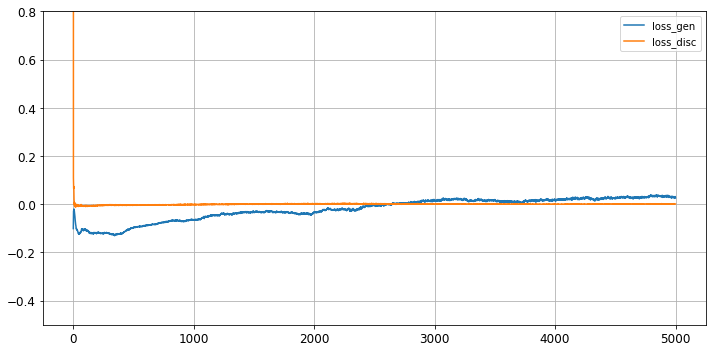

Predicted Values: (1000, 2)
save latent space


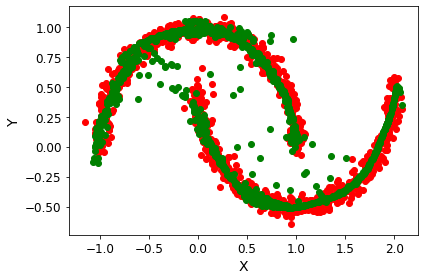

save countour line


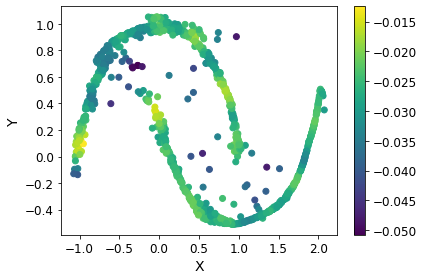

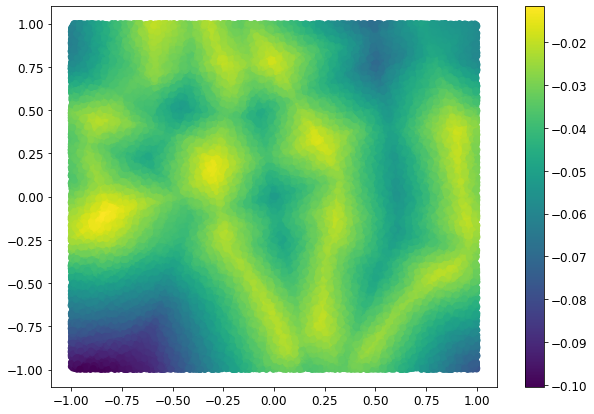

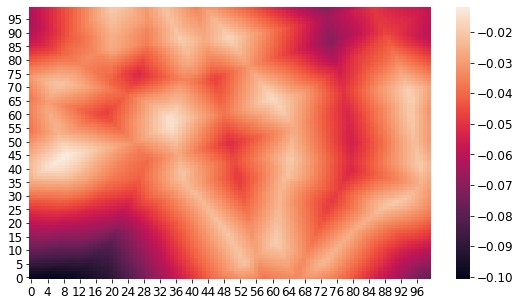

Epoch 5001/8000
critic: 0.000848 - generator: 0.025020 - 0s
Epoch 5002/8000
critic: 0.000879 - generator: 0.027217 - 0s
Epoch 5003/8000
critic: 0.001260 - generator: 0.023638 - 0s
Epoch 5004/8000
critic: 0.001983 - generator: 0.025172 - 0s
Epoch 5005/8000
critic: 0.002714 - generator: 0.025048 - 0s
Epoch 5006/8000
critic: 0.001832 - generator: 0.027238 - 0s
Epoch 5007/8000
critic: 0.001168 - generator: 0.027342 - 0s
Epoch 5008/8000
critic: 0.001067 - generator: 0.026124 - 0s
Epoch 5009/8000
critic: 0.001518 - generator: 0.025433 - 0s
Epoch 5010/8000
critic: 0.001638 - generator: 0.027709 - 0s
Epoch 5011/8000
critic: 0.001588 - generator: 0.026838 - 0s
Epoch 5012/8000
critic: 0.001751 - generator: 0.025385 - 0s
Epoch 5013/8000
critic: 0.000969 - generator: 0.027936 - 0s
Epoch 5014/8000
critic: 0.000792 - generator: 0.027572 - 0s
Epoch 5015/8000
critic: 0.001031 - generator: 0.025598 - 0s
Epoch 5016/8000
critic: 0.001300 - generator: 0.026340 - 0s
Epoch 5017/8000
critic: 0.000919 - gener

critic: 0.001984 - generator: 0.029616 - 1s
Epoch 5139/8000
critic: 0.001302 - generator: 0.030283 - 1s
Epoch 5140/8000
critic: 0.001089 - generator: 0.028652 - 1s
Epoch 5141/8000
critic: 0.001279 - generator: 0.027910 - 1s
Epoch 5142/8000
critic: 0.001139 - generator: 0.027667 - 1s
Epoch 5143/8000
critic: 0.001773 - generator: 0.031883 - 1s
Epoch 5144/8000
critic: 0.001841 - generator: 0.030310 - 0s
Epoch 5145/8000
critic: 0.001574 - generator: 0.029606 - 0s
Epoch 5146/8000
critic: 0.001298 - generator: 0.029970 - 1s
Epoch 5147/8000
critic: 0.001587 - generator: 0.030121 - 1s
Epoch 5148/8000
critic: 0.001298 - generator: 0.026523 - 1s
Epoch 5149/8000
critic: 0.001985 - generator: 0.027264 - 1s
Epoch 5150/8000
critic: 0.000889 - generator: 0.030995 - 1s
Epoch 5151/8000
critic: 0.000357 - generator: 0.030235 - 0s
Epoch 5152/8000
critic: 0.002301 - generator: 0.030232 - 0s
Epoch 5153/8000
critic: 0.000941 - generator: 0.028466 - 1s
Epoch 5154/8000
critic: 0.001634 - generator: 0.030945 -

critic: 0.000592 - generator: 0.034035 - 1s
Epoch 5276/8000
critic: 0.001961 - generator: 0.031494 - 1s
Epoch 5277/8000
critic: 0.001856 - generator: 0.033191 - 0s
Epoch 5278/8000
critic: 0.001049 - generator: 0.036091 - 1s
Epoch 5279/8000
critic: 0.001457 - generator: 0.032349 - 1s
Epoch 5280/8000
critic: 0.001508 - generator: 0.034744 - 1s
Epoch 5281/8000
critic: 0.001198 - generator: 0.033530 - 1s
Epoch 5282/8000
critic: 0.003081 - generator: 0.028375 - 1s
Epoch 5283/8000
critic: 0.001025 - generator: 0.031013 - 1s
Epoch 5284/8000
critic: 0.001492 - generator: 0.033072 - 1s
Epoch 5285/8000
critic: 0.001644 - generator: 0.032835 - 1s
Epoch 5286/8000
critic: 0.002346 - generator: 0.034754 - 0s
Epoch 5287/8000
critic: 0.002451 - generator: 0.036130 - 1s
Epoch 5288/8000
critic: 0.001579 - generator: 0.034840 - 1s
Epoch 5289/8000
critic: 0.000912 - generator: 0.037814 - 0s
Epoch 5290/8000
critic: 0.002115 - generator: 0.038392 - 1s
Epoch 5291/8000
critic: 0.001498 - generator: 0.036975 -

critic: 0.002454 - generator: 0.035669 - 0s
Epoch 5413/8000
critic: 0.002175 - generator: 0.034167 - 0s
Epoch 5414/8000
critic: 0.002234 - generator: 0.034720 - 1s
Epoch 5415/8000
critic: 0.001903 - generator: 0.034431 - 0s
Epoch 5416/8000
critic: 0.001883 - generator: 0.032001 - 1s
Epoch 5417/8000
critic: 0.002319 - generator: 0.035204 - 0s
Epoch 5418/8000
critic: 0.000895 - generator: 0.036813 - 1s
Epoch 5419/8000
critic: 0.003279 - generator: 0.033540 - 0s
Epoch 5420/8000
critic: 0.002156 - generator: 0.033404 - 1s
Epoch 5421/8000
critic: 0.001833 - generator: 0.032332 - 1s
Epoch 5422/8000
critic: 0.002892 - generator: 0.034158 - 1s
Epoch 5423/8000
critic: 0.001913 - generator: 0.036014 - 1s
Epoch 5424/8000
critic: 0.002070 - generator: 0.037127 - 0s
Epoch 5425/8000
critic: 0.001603 - generator: 0.034398 - 1s
Epoch 5426/8000
critic: 0.001179 - generator: 0.034977 - 0s
Epoch 5427/8000
critic: 0.001851 - generator: 0.033839 - 1s
Epoch 5428/8000
critic: 0.001690 - generator: 0.033612 -

critic: 0.001674 - generator: 0.032584 - 0s
Epoch 5550/8000
critic: 0.001963 - generator: 0.034984 - 0s
Epoch 5551/8000
critic: 0.002213 - generator: 0.034788 - 0s
Epoch 5552/8000
critic: 0.002210 - generator: 0.032656 - 0s
Epoch 5553/8000
critic: 0.001584 - generator: 0.032540 - 1s
Epoch 5554/8000
critic: 0.001991 - generator: 0.031691 - 0s
Epoch 5555/8000
critic: 0.001805 - generator: 0.033278 - 1s
Epoch 5556/8000
critic: 0.002480 - generator: 0.034263 - 1s
Epoch 5557/8000
critic: 0.002215 - generator: 0.035290 - 0s
Epoch 5558/8000
critic: 0.001393 - generator: 0.035611 - 0s
Epoch 5559/8000
critic: 0.001347 - generator: 0.038953 - 1s
Epoch 5560/8000
critic: 0.003038 - generator: 0.035345 - 0s
Epoch 5561/8000
critic: 0.002232 - generator: 0.038021 - 1s
Epoch 5562/8000
critic: 0.001261 - generator: 0.035661 - 0s
Epoch 5563/8000
critic: 0.001853 - generator: 0.035283 - 1s
Epoch 5564/8000
critic: 0.002162 - generator: 0.036282 - 1s
Epoch 5565/8000
critic: 0.001340 - generator: 0.034256 -

critic: 0.000922 - generator: 0.034472 - 0s
Epoch 5687/8000
critic: 0.002358 - generator: 0.035281 - 0s
Epoch 5688/8000
critic: 0.002069 - generator: 0.034595 - 1s
Epoch 5689/8000
critic: 0.002731 - generator: 0.035833 - 0s
Epoch 5690/8000
critic: 0.001851 - generator: 0.037556 - 0s
Epoch 5691/8000
critic: 0.002384 - generator: 0.035805 - 0s
Epoch 5692/8000
critic: 0.002579 - generator: 0.037064 - 0s
Epoch 5693/8000
critic: 0.003075 - generator: 0.035440 - 0s
Epoch 5694/8000
critic: 0.002405 - generator: 0.033881 - 0s
Epoch 5695/8000
critic: 0.002869 - generator: 0.035645 - 0s
Epoch 5696/8000
critic: 0.002143 - generator: 0.035246 - 0s
Epoch 5697/8000
critic: 0.001214 - generator: 0.033990 - 0s
Epoch 5698/8000
critic: 0.003318 - generator: 0.036453 - 0s
Epoch 5699/8000
critic: 0.002804 - generator: 0.035916 - 0s
Epoch 5700/8000
critic: 0.003430 - generator: 0.034019 - 0s
Epoch 5701/8000
critic: 0.002518 - generator: 0.036384 - 0s
Epoch 5702/8000
critic: 0.001187 - generator: 0.035310 -

critic: 0.001596 - generator: 0.035289 - 0s
Epoch 5824/8000
critic: 0.001975 - generator: 0.035488 - 0s
Epoch 5825/8000
critic: 0.002753 - generator: 0.035701 - 0s
Epoch 5826/8000
critic: 0.002147 - generator: 0.030611 - 0s
Epoch 5827/8000
critic: 0.002409 - generator: 0.032732 - 0s
Epoch 5828/8000
critic: 0.001268 - generator: 0.034623 - 0s
Epoch 5829/8000
critic: 0.002373 - generator: 0.034207 - 0s
Epoch 5830/8000
critic: 0.002229 - generator: 0.030945 - 0s
Epoch 5831/8000
critic: 0.001884 - generator: 0.030900 - 0s
Epoch 5832/8000
critic: 0.002431 - generator: 0.032244 - 0s
Epoch 5833/8000
critic: 0.001864 - generator: 0.034940 - 0s
Epoch 5834/8000
critic: 0.002505 - generator: 0.034010 - 1s
Epoch 5835/8000
critic: 0.002470 - generator: 0.031824 - 0s
Epoch 5836/8000
critic: 0.002155 - generator: 0.033795 - 0s
Epoch 5837/8000
critic: 0.000979 - generator: 0.033657 - 0s
Epoch 5838/8000
critic: 0.002044 - generator: 0.032083 - 0s
Epoch 5839/8000
critic: 0.001849 - generator: 0.033621 -

critic: 0.002513 - generator: 0.037672 - 0s
Epoch 5961/8000
critic: 0.003116 - generator: 0.036129 - 0s
Epoch 5962/8000
critic: 0.002567 - generator: 0.038342 - 0s
Epoch 5963/8000
critic: 0.001854 - generator: 0.041034 - 0s
Epoch 5964/8000
critic: 0.002175 - generator: 0.038909 - 0s
Epoch 5965/8000
critic: 0.002023 - generator: 0.040452 - 0s
Epoch 5966/8000
critic: 0.002199 - generator: 0.040912 - 0s
Epoch 5967/8000
critic: 0.002326 - generator: 0.039714 - 0s
Epoch 5968/8000
critic: 0.001731 - generator: 0.039102 - 0s
Epoch 5969/8000
critic: 0.003382 - generator: 0.040890 - 0s
Epoch 5970/8000
critic: 0.001866 - generator: 0.043913 - 0s
Epoch 5971/8000
critic: 0.002077 - generator: 0.038144 - 1s
Epoch 5972/8000
critic: 0.003704 - generator: 0.038240 - 0s
Epoch 5973/8000
critic: 0.002463 - generator: 0.043256 - 0s
Epoch 5974/8000
critic: 0.002672 - generator: 0.039663 - 0s
Epoch 5975/8000
critic: 0.003909 - generator: 0.039462 - 0s
Epoch 5976/8000
critic: 0.001533 - generator: 0.041744 -

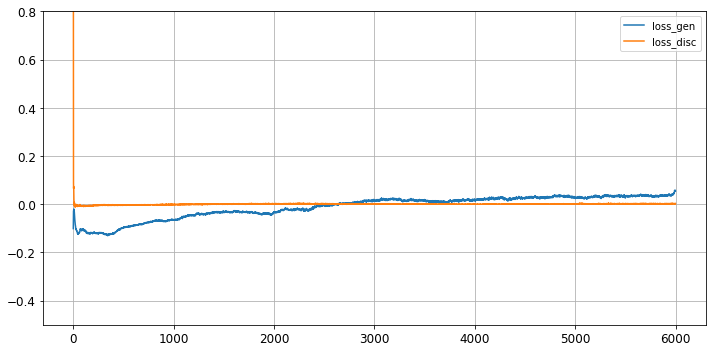

Predicted Values: (1000, 2)
save latent space


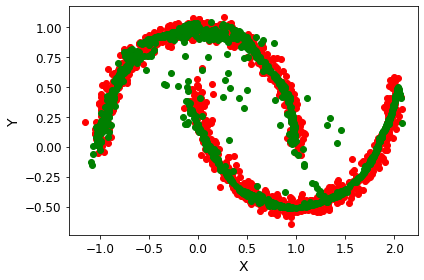

save countour line


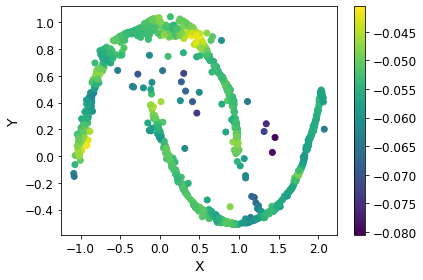

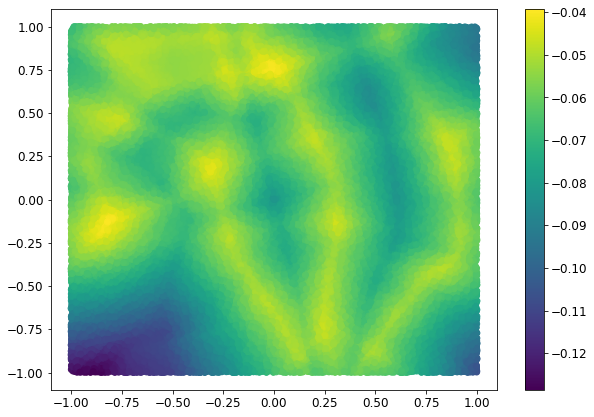

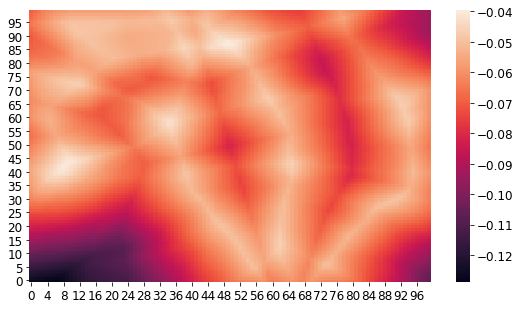

Epoch 6001/8000
critic: 0.002681 - generator: 0.053605 - 0s
Epoch 6002/8000
critic: 0.003182 - generator: 0.056345 - 0s
Epoch 6003/8000
critic: 0.002342 - generator: 0.057793 - 0s
Epoch 6004/8000
critic: 0.002502 - generator: 0.054443 - 0s
Epoch 6005/8000
critic: 0.001300 - generator: 0.052583 - 0s
Epoch 6006/8000
critic: 0.002861 - generator: 0.053390 - 0s
Epoch 6007/8000
critic: 0.003091 - generator: 0.056584 - 0s
Epoch 6008/8000
critic: 0.001807 - generator: 0.054336 - 0s
Epoch 6009/8000
critic: 0.002554 - generator: 0.051236 - 0s
Epoch 6010/8000
critic: 0.002871 - generator: 0.052596 - 0s
Epoch 6011/8000
critic: 0.003659 - generator: 0.054528 - 0s
Epoch 6012/8000
critic: 0.001703 - generator: 0.050778 - 0s
Epoch 6013/8000
critic: 0.001174 - generator: 0.051642 - 0s
Epoch 6014/8000
critic: 0.002040 - generator: 0.049691 - 0s
Epoch 6015/8000
critic: 0.002613 - generator: 0.051112 - 0s
Epoch 6016/8000
critic: 0.001613 - generator: 0.048052 - 0s
Epoch 6017/8000
critic: 0.002894 - gener

critic: 0.001991 - generator: 0.050686 - 0s
Epoch 6139/8000
critic: 0.002692 - generator: 0.051617 - 0s
Epoch 6140/8000
critic: 0.003153 - generator: 0.053538 - 0s
Epoch 6141/8000
critic: 0.002413 - generator: 0.052568 - 0s
Epoch 6142/8000
critic: 0.003455 - generator: 0.050665 - 0s
Epoch 6143/8000
critic: 0.003227 - generator: 0.050301 - 0s
Epoch 6144/8000
critic: 0.003945 - generator: 0.053246 - 0s
Epoch 6145/8000
critic: 0.002875 - generator: 0.052794 - 0s
Epoch 6146/8000
critic: 0.002169 - generator: 0.050593 - 0s
Epoch 6147/8000
critic: 0.002179 - generator: 0.052362 - 0s
Epoch 6148/8000
critic: 0.002735 - generator: 0.052449 - 0s
Epoch 6149/8000
critic: 0.003272 - generator: 0.048278 - 0s
Epoch 6150/8000
critic: 0.001973 - generator: 0.050841 - 0s
Epoch 6151/8000
critic: 0.003478 - generator: 0.053300 - 0s
Epoch 6152/8000
critic: 0.003656 - generator: 0.055108 - 0s
Epoch 6153/8000
critic: 0.002485 - generator: 0.055449 - 1s
Epoch 6154/8000
critic: 0.002346 - generator: 0.057059 -

critic: 0.002548 - generator: 0.060120 - 0s
Epoch 6276/8000
critic: 0.001252 - generator: 0.056881 - 0s
Epoch 6277/8000
critic: 0.003145 - generator: 0.053521 - 0s
Epoch 6278/8000
critic: 0.001653 - generator: 0.055055 - 0s
Epoch 6279/8000
critic: 0.002539 - generator: 0.055515 - 0s
Epoch 6280/8000
critic: 0.002626 - generator: 0.054156 - 0s
Epoch 6281/8000
critic: 0.002869 - generator: 0.056388 - 0s
Epoch 6282/8000
critic: 0.002249 - generator: 0.055565 - 0s
Epoch 6283/8000
critic: 0.003454 - generator: 0.055741 - 0s
Epoch 6284/8000
critic: 0.002207 - generator: 0.057182 - 0s
Epoch 6285/8000
critic: 0.002157 - generator: 0.057029 - 0s
Epoch 6286/8000
critic: 0.003248 - generator: 0.056119 - 0s
Epoch 6287/8000
critic: 0.001671 - generator: 0.063211 - 0s
Epoch 6288/8000
critic: 0.001936 - generator: 0.056791 - 0s
Epoch 6289/8000
critic: 0.002377 - generator: 0.052224 - 0s
Epoch 6290/8000
critic: 0.002013 - generator: 0.058787 - 1s
Epoch 6291/8000
critic: 0.002404 - generator: 0.057988 -

critic: 0.002738 - generator: 0.061836 - 0s
Epoch 6413/8000
critic: 0.001156 - generator: 0.059197 - 0s
Epoch 6414/8000
critic: 0.002449 - generator: 0.055180 - 0s
Epoch 6415/8000
critic: 0.002565 - generator: 0.053516 - 0s
Epoch 6416/8000
critic: 0.002648 - generator: 0.055405 - 0s
Epoch 6417/8000
critic: 0.001601 - generator: 0.054536 - 0s
Epoch 6418/8000
critic: 0.003646 - generator: 0.058472 - 0s
Epoch 6419/8000
critic: 0.002356 - generator: 0.059243 - 0s
Epoch 6420/8000
critic: 0.002258 - generator: 0.058879 - 0s
Epoch 6421/8000
critic: 0.002225 - generator: 0.055265 - 1s
Epoch 6422/8000
critic: 0.001817 - generator: 0.058647 - 0s
Epoch 6423/8000
critic: 0.002359 - generator: 0.058940 - 0s
Epoch 6424/8000
critic: 0.002171 - generator: 0.056594 - 0s
Epoch 6425/8000
critic: 0.001860 - generator: 0.056560 - 0s
Epoch 6426/8000
critic: 0.001645 - generator: 0.058796 - 0s
Epoch 6427/8000
critic: 0.002591 - generator: 0.058570 - 0s
Epoch 6428/8000
critic: 0.003033 - generator: 0.057333 -

critic: 0.002436 - generator: 0.056042 - 0s
Epoch 6550/8000
critic: 0.003180 - generator: 0.060260 - 0s
Epoch 6551/8000
critic: 0.003938 - generator: 0.058075 - 0s
Epoch 6552/8000
critic: 0.001685 - generator: 0.059036 - 0s
Epoch 6553/8000
critic: 0.002955 - generator: 0.056882 - 0s
Epoch 6554/8000
critic: 0.002772 - generator: 0.056039 - 0s
Epoch 6555/8000
critic: 0.003086 - generator: 0.061135 - 0s
Epoch 6556/8000
critic: 0.001926 - generator: 0.064915 - 0s
Epoch 6557/8000
critic: 0.002725 - generator: 0.062917 - 0s
Epoch 6558/8000
critic: 0.002003 - generator: 0.063152 - 0s
Epoch 6559/8000
critic: 0.001259 - generator: 0.061527 - 0s
Epoch 6560/8000
critic: 0.001954 - generator: 0.062034 - 0s
Epoch 6561/8000
critic: 0.003678 - generator: 0.059605 - 0s
Epoch 6562/8000
critic: 0.001716 - generator: 0.059950 - 1s
Epoch 6563/8000
critic: 0.002578 - generator: 0.059334 - 0s
Epoch 6564/8000
critic: 0.001947 - generator: 0.063827 - 0s
Epoch 6565/8000
critic: 0.002562 - generator: 0.063428 -

critic: 0.002736 - generator: 0.063717 - 0s
Epoch 6687/8000
critic: 0.001437 - generator: 0.069841 - 0s
Epoch 6688/8000
critic: 0.003260 - generator: 0.073824 - 0s
Epoch 6689/8000
critic: 0.002162 - generator: 0.068294 - 1s
Epoch 6690/8000
critic: 0.001878 - generator: 0.069447 - 0s
Epoch 6691/8000
critic: 0.001312 - generator: 0.071587 - 0s
Epoch 6692/8000
critic: 0.001992 - generator: 0.068708 - 0s
Epoch 6693/8000
critic: 0.003215 - generator: 0.070338 - 0s
Epoch 6694/8000
critic: 0.001515 - generator: 0.072979 - 0s
Epoch 6695/8000
critic: 0.002740 - generator: 0.069202 - 0s
Epoch 6696/8000
critic: 0.001942 - generator: 0.066057 - 1s
Epoch 6697/8000
critic: 0.002556 - generator: 0.071885 - 0s
Epoch 6698/8000
critic: 0.002080 - generator: 0.072123 - 0s
Epoch 6699/8000
critic: 0.003036 - generator: 0.067628 - 0s
Epoch 6700/8000
critic: 0.001770 - generator: 0.070679 - 0s
Epoch 6701/8000
critic: 0.002704 - generator: 0.069651 - 0s
Epoch 6702/8000
critic: 0.002238 - generator: 0.069520 -

critic: 0.002774 - generator: 0.061772 - 0s
Epoch 6824/8000
critic: 0.002467 - generator: 0.065246 - 0s
Epoch 6825/8000
critic: 0.001856 - generator: 0.065263 - 0s
Epoch 6826/8000
critic: 0.001630 - generator: 0.060038 - 0s
Epoch 6827/8000
critic: 0.002141 - generator: 0.061652 - 0s
Epoch 6828/8000
critic: 0.001573 - generator: 0.064064 - 0s
Epoch 6829/8000
critic: 0.002153 - generator: 0.060716 - 0s
Epoch 6830/8000
critic: 0.002646 - generator: 0.061105 - 0s
Epoch 6831/8000
critic: 0.003121 - generator: 0.060695 - 0s
Epoch 6832/8000
critic: 0.002198 - generator: 0.059929 - 0s
Epoch 6833/8000
critic: 0.002731 - generator: 0.060099 - 0s
Epoch 6834/8000
critic: 0.002118 - generator: 0.060652 - 0s
Epoch 6835/8000
critic: 0.002973 - generator: 0.061780 - 0s
Epoch 6836/8000
critic: 0.002656 - generator: 0.059666 - 0s
Epoch 6837/8000
critic: 0.001532 - generator: 0.061741 - 0s
Epoch 6838/8000
critic: 0.002141 - generator: 0.062098 - 0s
Epoch 6839/8000
critic: 0.001944 - generator: 0.058050 -

critic: 0.001610 - generator: 0.049884 - 0s
Epoch 6961/8000
critic: 0.002135 - generator: 0.049251 - 0s
Epoch 6962/8000
critic: 0.002209 - generator: 0.052448 - 0s
Epoch 6963/8000
critic: 0.001952 - generator: 0.050323 - 0s
Epoch 6964/8000
critic: 0.001716 - generator: 0.046256 - 0s
Epoch 6965/8000
critic: 0.003465 - generator: 0.048689 - 0s
Epoch 6966/8000
critic: 0.002051 - generator: 0.050306 - 0s
Epoch 6967/8000
critic: 0.002092 - generator: 0.049882 - 1s
Epoch 6968/8000
critic: 0.002102 - generator: 0.049404 - 0s
Epoch 6969/8000
critic: 0.001360 - generator: 0.047267 - 0s
Epoch 6970/8000
critic: 0.001639 - generator: 0.048341 - 0s
Epoch 6971/8000
critic: 0.002103 - generator: 0.050123 - 0s
Epoch 6972/8000
critic: 0.001971 - generator: 0.047928 - 0s
Epoch 6973/8000
critic: 0.002479 - generator: 0.050281 - 0s
Epoch 6974/8000
critic: 0.002186 - generator: 0.048910 - 1s
Epoch 6975/8000
critic: 0.001555 - generator: 0.046795 - 0s
Epoch 6976/8000
critic: 0.001715 - generator: 0.049939 -

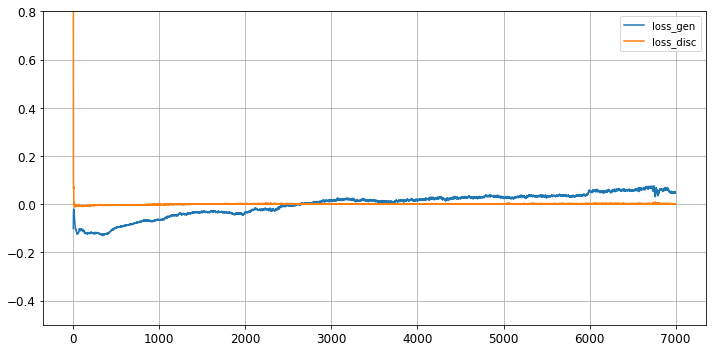

Predicted Values: (1000, 2)
save latent space


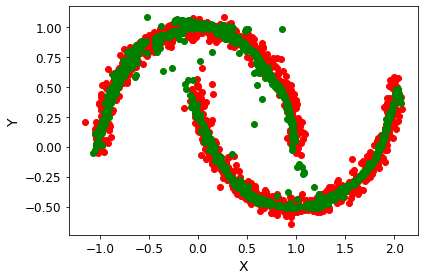

save countour line


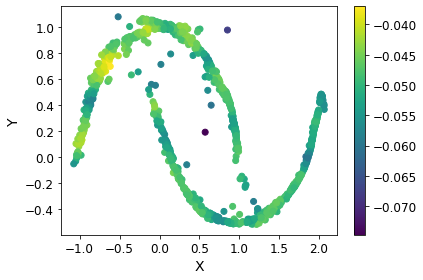

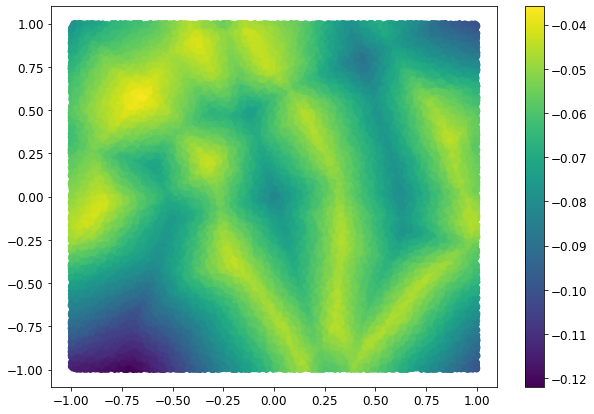

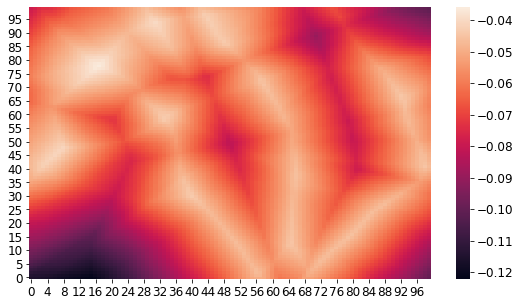

Epoch 7001/8000
critic: 0.001292 - generator: 0.053233 - 0s
Epoch 7002/8000
critic: 0.001526 - generator: 0.051378 - 0s
Epoch 7003/8000
critic: 0.002317 - generator: 0.050934 - 0s
Epoch 7004/8000
critic: 0.002305 - generator: 0.053297 - 0s
Epoch 7005/8000
critic: 0.002587 - generator: 0.052626 - 0s
Epoch 7006/8000
critic: 0.001381 - generator: 0.051994 - 0s
Epoch 7007/8000
critic: 0.001657 - generator: 0.054863 - 0s
Epoch 7008/8000
critic: 0.002152 - generator: 0.052620 - 0s
Epoch 7009/8000
critic: 0.001908 - generator: 0.052009 - 0s
Epoch 7010/8000
critic: 0.001137 - generator: 0.051403 - 0s
Epoch 7011/8000
critic: 0.002153 - generator: 0.051615 - 0s
Epoch 7012/8000
critic: 0.001650 - generator: 0.048376 - 0s
Epoch 7013/8000
critic: 0.001583 - generator: 0.051593 - 0s
Epoch 7014/8000
critic: 0.001828 - generator: 0.050827 - 0s
Epoch 7015/8000
critic: 0.001550 - generator: 0.049876 - 0s
Epoch 7016/8000
critic: 0.001251 - generator: 0.050509 - 0s
Epoch 7017/8000
critic: 0.001422 - gener

critic: 0.001632 - generator: 0.038737 - 1s
Epoch 7139/8000
critic: 0.001842 - generator: 0.040204 - 0s
Epoch 7140/8000
critic: 0.001114 - generator: 0.040633 - 0s
Epoch 7141/8000
critic: 0.001443 - generator: 0.036910 - 0s
Epoch 7142/8000
critic: 0.002176 - generator: 0.036946 - 0s
Epoch 7143/8000
critic: 0.002429 - generator: 0.040462 - 0s
Epoch 7144/8000
critic: 0.002652 - generator: 0.039906 - 0s
Epoch 7145/8000
critic: 0.002862 - generator: 0.037830 - 0s
Epoch 7146/8000
critic: 0.001315 - generator: 0.038356 - 0s
Epoch 7147/8000
critic: 0.002223 - generator: 0.037155 - 0s
Epoch 7148/8000
critic: 0.001830 - generator: 0.038836 - 1s
Epoch 7149/8000
critic: 0.002954 - generator: 0.036750 - 0s
Epoch 7150/8000
critic: 0.001535 - generator: 0.035662 - 1s
Epoch 7151/8000
critic: 0.001581 - generator: 0.036637 - 1s
Epoch 7152/8000
critic: 0.002213 - generator: 0.036204 - 0s
Epoch 7153/8000
critic: 0.002617 - generator: 0.036005 - 1s
Epoch 7154/8000
critic: 0.002126 - generator: 0.035735 -

critic: 0.001644 - generator: 0.038268 - 1s
Epoch 7276/8000
critic: 0.001445 - generator: 0.036743 - 1s
Epoch 7277/8000
critic: 0.001772 - generator: 0.039225 - 1s
Epoch 7278/8000
critic: 0.001740 - generator: 0.042091 - 1s
Epoch 7279/8000
critic: 0.001900 - generator: 0.040467 - 1s
Epoch 7280/8000
critic: 0.001756 - generator: 0.039389 - 1s
Epoch 7281/8000
critic: 0.001341 - generator: 0.043685 - 1s
Epoch 7282/8000
critic: 0.002242 - generator: 0.044664 - 1s
Epoch 7283/8000
critic: 0.001710 - generator: 0.040192 - 1s
Epoch 7284/8000
critic: 0.001343 - generator: 0.040074 - 1s
Epoch 7285/8000
critic: 0.000904 - generator: 0.043699 - 1s
Epoch 7286/8000
critic: 0.001744 - generator: 0.045659 - 1s
Epoch 7287/8000
critic: 0.002028 - generator: 0.043329 - 1s
Epoch 7288/8000
critic: 0.001889 - generator: 0.042518 - 1s
Epoch 7289/8000
critic: 0.002049 - generator: 0.044727 - 1s
Epoch 7290/8000
critic: 0.001014 - generator: 0.042098 - 1s
Epoch 7291/8000
critic: 0.001375 - generator: 0.042463 -

critic: 0.002177 - generator: 0.032384 - 1s
Epoch 7413/8000
critic: 0.001298 - generator: 0.035322 - 1s
Epoch 7414/8000
critic: 0.001446 - generator: 0.037788 - 1s
Epoch 7415/8000
critic: 0.001630 - generator: 0.036513 - 1s
Epoch 7416/8000
critic: 0.001818 - generator: 0.038054 - 1s
Epoch 7417/8000
critic: 0.001858 - generator: 0.036864 - 1s
Epoch 7418/8000
critic: 0.001761 - generator: 0.033907 - 1s
Epoch 7419/8000
critic: 0.001642 - generator: 0.036542 - 1s
Epoch 7420/8000
critic: 0.002105 - generator: 0.033241 - 1s
Epoch 7421/8000
critic: 0.001957 - generator: 0.032018 - 1s
Epoch 7422/8000
critic: 0.001405 - generator: 0.035228 - 1s
Epoch 7423/8000
critic: 0.001433 - generator: 0.037521 - 1s
Epoch 7424/8000
critic: 0.001802 - generator: 0.037917 - 1s
Epoch 7425/8000
critic: 0.001497 - generator: 0.036171 - 1s
Epoch 7426/8000
critic: 0.002306 - generator: 0.031829 - 1s
Epoch 7427/8000
critic: 0.001417 - generator: 0.036782 - 1s
Epoch 7428/8000
critic: 0.001359 - generator: 0.033023 -

critic: 0.001660 - generator: 0.031053 - 1s
Epoch 7550/8000
critic: 0.001662 - generator: 0.031813 - 1s
Epoch 7551/8000
critic: 0.002016 - generator: 0.033179 - 1s
Epoch 7552/8000
critic: 0.002908 - generator: 0.031760 - 1s
Epoch 7553/8000
critic: 0.001900 - generator: 0.031274 - 1s
Epoch 7554/8000
critic: 0.001200 - generator: 0.031738 - 1s
Epoch 7555/8000
critic: 0.001645 - generator: 0.027841 - 1s
Epoch 7556/8000
critic: 0.001823 - generator: 0.029760 - 1s
Epoch 7557/8000
critic: 0.001649 - generator: 0.028872 - 1s
Epoch 7558/8000
critic: 0.001394 - generator: 0.031452 - 1s
Epoch 7559/8000
critic: 0.002022 - generator: 0.036493 - 1s
Epoch 7560/8000
critic: 0.001742 - generator: 0.031777 - 1s
Epoch 7561/8000
critic: 0.001692 - generator: 0.029187 - 1s
Epoch 7562/8000
critic: 0.001439 - generator: 0.026887 - 1s
Epoch 7563/8000
critic: 0.001914 - generator: 0.029123 - 1s
Epoch 7564/8000
critic: 0.002268 - generator: 0.034698 - 1s
Epoch 7565/8000
critic: 0.002405 - generator: 0.032867 -

critic: 0.001860 - generator: 0.022367 - 1s
Epoch 7687/8000
critic: 0.002686 - generator: 0.023650 - 1s
Epoch 7688/8000
critic: 0.001564 - generator: 0.021810 - 1s
Epoch 7689/8000
critic: 0.002258 - generator: 0.022419 - 1s
Epoch 7690/8000
critic: 0.001975 - generator: 0.027453 - 1s
Epoch 7691/8000
critic: 0.002214 - generator: 0.026531 - 1s
Epoch 7692/8000
critic: 0.002022 - generator: 0.024302 - 1s
Epoch 7693/8000
critic: 0.001767 - generator: 0.023733 - 1s
Epoch 7694/8000
critic: 0.001530 - generator: 0.023543 - 1s
Epoch 7695/8000
critic: 0.002361 - generator: 0.026304 - 1s
Epoch 7696/8000
critic: 0.002291 - generator: 0.023856 - 1s
Epoch 7697/8000
critic: 0.002413 - generator: 0.024168 - 1s
Epoch 7698/8000
critic: 0.002700 - generator: 0.028425 - 1s
Epoch 7699/8000
critic: 0.002311 - generator: 0.022800 - 1s
Epoch 7700/8000
critic: 0.002699 - generator: 0.017689 - 1s
Epoch 7701/8000
critic: 0.001961 - generator: 0.021217 - 1s
Epoch 7702/8000
critic: 0.002214 - generator: 0.025663 -

critic: 0.001598 - generator: 0.014204 - 1s
Epoch 7824/8000
critic: 0.001722 - generator: 0.014104 - 1s
Epoch 7825/8000
critic: 0.001942 - generator: 0.013540 - 1s
Epoch 7826/8000
critic: 0.001391 - generator: 0.011371 - 1s
Epoch 7827/8000
critic: 0.002469 - generator: 0.012447 - 1s
Epoch 7828/8000
critic: 0.001450 - generator: 0.015578 - 1s
Epoch 7829/8000
critic: 0.002311 - generator: 0.015531 - 1s
Epoch 7830/8000
critic: 0.002132 - generator: 0.018458 - 1s
Epoch 7831/8000
critic: 0.001102 - generator: 0.016347 - 1s
Epoch 7832/8000
critic: 0.001672 - generator: 0.013804 - 1s
Epoch 7833/8000
critic: 0.001634 - generator: 0.015492 - 1s
Epoch 7834/8000
critic: 0.001977 - generator: 0.014753 - 1s
Epoch 7835/8000
critic: 0.002135 - generator: 0.014341 - 1s
Epoch 7836/8000
critic: 0.001641 - generator: 0.015906 - 1s
Epoch 7837/8000
critic: 0.001511 - generator: 0.014571 - 1s
Epoch 7838/8000
critic: 0.002415 - generator: 0.015490 - 1s
Epoch 7839/8000
critic: 0.001510 - generator: 0.012901 -

critic: 0.003483 - generator: -0.014372 - 1s
Epoch 7961/8000
critic: 0.002816 - generator: -0.010386 - 1s
Epoch 7962/8000
critic: 0.001973 - generator: -0.009770 - 1s
Epoch 7963/8000
critic: 0.002056 - generator: -0.009824 - 1s
Epoch 7964/8000
critic: 0.002465 - generator: -0.010276 - 1s
Epoch 7965/8000
critic: 0.002012 - generator: -0.011573 - 1s
Epoch 7966/8000
critic: 0.002840 - generator: -0.011985 - 1s
Epoch 7967/8000
critic: 0.002700 - generator: -0.008101 - 1s
Epoch 7968/8000
critic: 0.001675 - generator: -0.007369 - 1s
Epoch 7969/8000
critic: 0.002391 - generator: -0.010191 - 1s
Epoch 7970/8000
critic: 0.002999 - generator: -0.010235 - 1s
Epoch 7971/8000
critic: 0.002468 - generator: -0.008884 - 1s
Epoch 7972/8000
critic: 0.002396 - generator: -0.003456 - 1s
Epoch 7973/8000
critic: 0.002805 - generator: -0.009105 - 1s
Epoch 7974/8000
critic: 0.002576 - generator: -0.013367 - 1s
Epoch 7975/8000
critic: 0.002684 - generator: -0.013593 - 1s
Epoch 7976/8000
critic: 0.003298 - gener

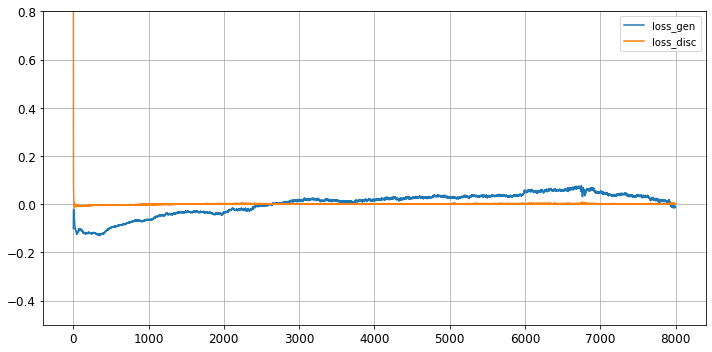

Predicted Values: (1000, 2)
save latent space


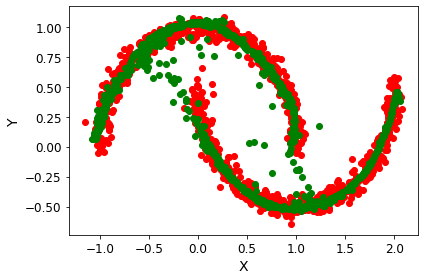

save countour line


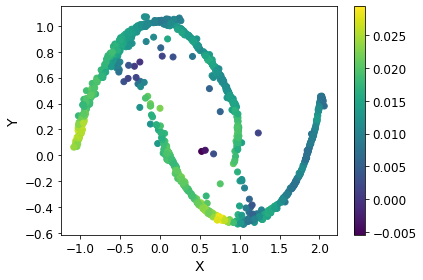

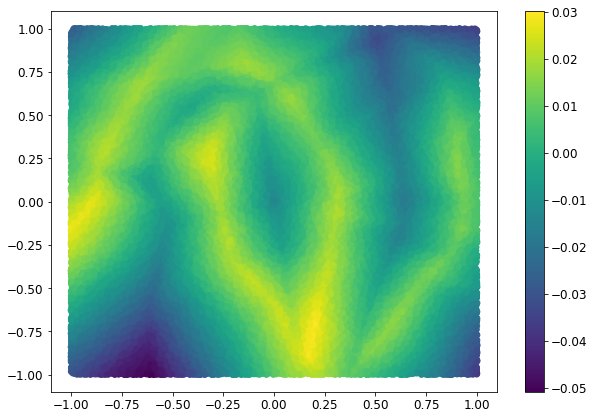

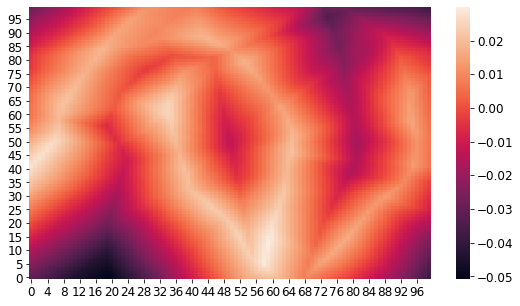

In [10]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [11]:
k=k
epoch = 8000

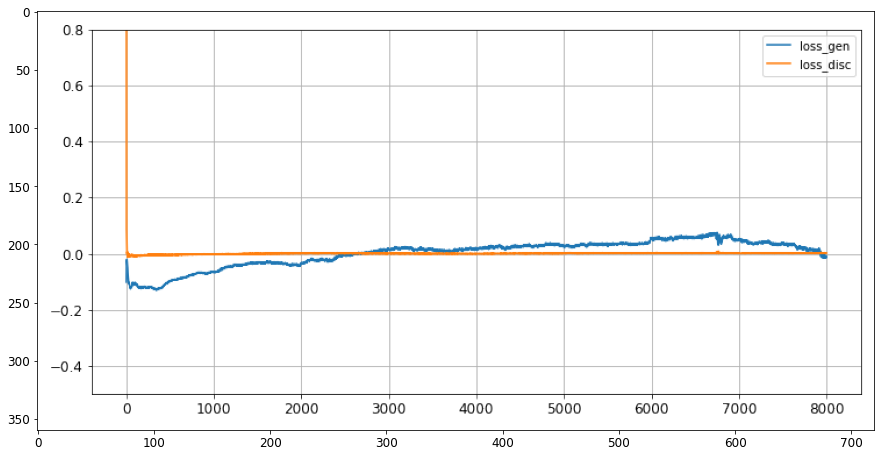

In [12]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

In [13]:
generator = keras.models.load_model('GANS/Models/generator_v'+str(k)+'_epochs_'+str(epoch))

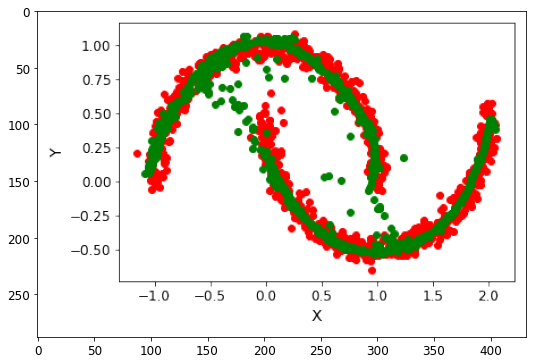

In [14]:
#Discriminator Loss
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)

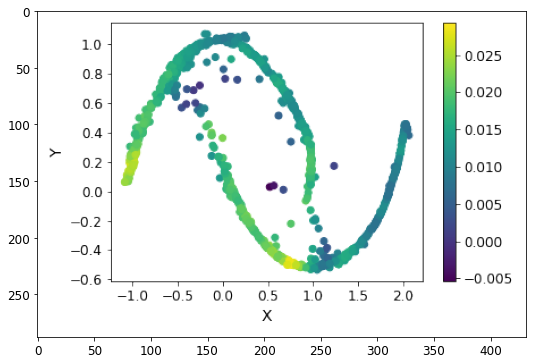

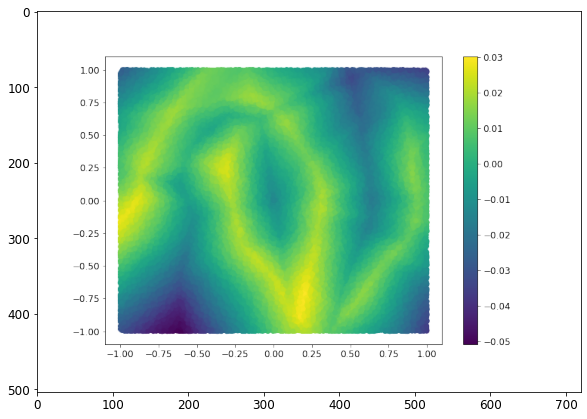

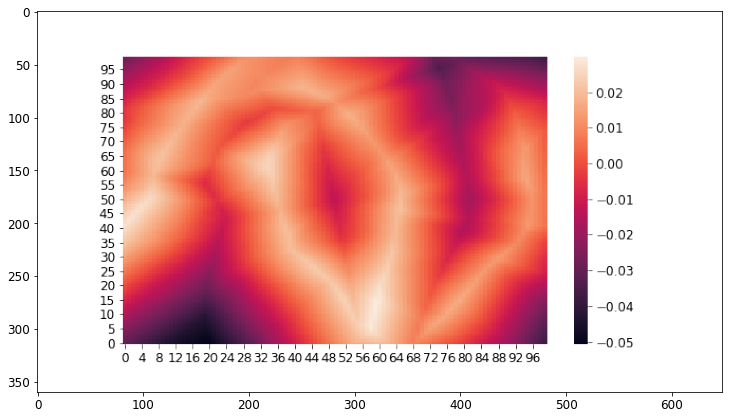

In [15]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[20,6])
plt.imshow(countour_line)

countour_mesh = Image.open('GANS/Result/'+'countour_mesh_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Mesh",figsize=[18,7])
plt.imshow(countour_mesh)

heatmap = Image.open('GANS/Result/'+'heatmap_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Heatmap",figsize=[18,7])
plt.imshow(heatmap)



### Applying the prediction function

## Fixed Input

input_test : (700, 2)


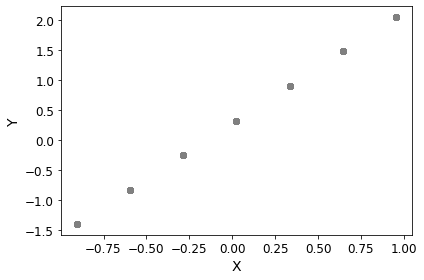

In [16]:
# define these for desired prediction
x_input = [-1,-0.5,0,0.5,1.0,1.5,2.0]
n_points = 700
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//7, n_features), x_input[0])
predict2 = np.full((n_points//7, n_features), x_input[1])
predict3 = np.full((n_points//7, n_features), x_input[2])
predict4 = np.full((n_points//7, n_features), x_input[3])
predict5 = np.full((n_points//7, n_features), x_input[4])
predict6 = np.full((n_points//7, n_features), x_input[5])
predict7 = np.full((n_points//7, n_features), x_input[6])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [17]:
X_generated = wgan.predict(input_test, scaler)

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

Generated Data: (699, 2)


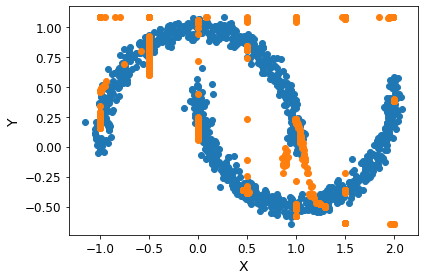

In [18]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()